## Data Dictionary

    ACCTAGE='Age of Oldest Account'
    DDA='Checking Account'
    DDABAL='Checking Balance'
    DEP='Checking Deposits'
    DEPAMT='Amount Deposited'
    CASHBK='Number Cash Back'
    CHECKS='Number of Checks'
    DIRDEP='Direct Deposit'
    NSF='Number Insufficient Fund'
    NSFAMT='Amount NSF'
    PHONE='Number Telephone Banking'
    TELLER='Teller Visits'
    ATM='ATM'
    ATMAMT='ATM Withdrawal Amount'
    POS='Number Point of Sale'
    POSAMT='Amount Point of Sale'
    CD='Certificate of Deposit'
    CDBAL='CD Balance'
    IRA='Retirement Account'
    IRABAL='IRA Balance'
    LOC='Line of Credit'
    LOCBAL='Line of Credit Balance'
    INV='Investment'
    INVBAL='Investment Balance'
    ILS='Installment Loan'
    ILSBAL='Loan Balance'
    MM='Money Market'
    MMBAL='Money Market Balance'
    MMCRED='Money Market Credits'
    MTG='Mortgage'
    MTGBAL='Mortgage Balance'
    SAV='Saving Account'
    SAVBAL='Saving Balance'
    CC='Credit Card'
    CCBAL='Credit Card Balance'
    CCPURC='Credit Card Purchases'
    SDB='Safety Deposit Box'
    INCOME='Income'
    HMOWN='Owns Home'
    LORES='Length of Residence'
    HMVAL='Home Value'
    AGE='Age'
    CRSCORE='Credit Score'
    MOVED='Recent Address Change'
    INAREA='Local Address'
    INS='Insurance Product'
    BRANCH='Branch of Bank'
    RES='Area Classification’

In [2]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# Import different model classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# Save the model so that we can import it and use it later
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

## Part 1: Cleaning

1.What is the size of each data frame? How many rows? How many columns?

In [3]:
df = pd.read_csv('data/cap_bank.csv')
df.head()


ACCTAGE  DDA   DDABAL  DEP   DEPAMT  CASHBK  CHECKS  DIRDEP  NSF  NSFAMT  \
0      0.3    1   419.27    2  1170.06       0       0       0    0     0.0   
1      0.7    1  1986.81    1   446.93       0       1       1    0     0.0   
2      4.1    0     0.00    0     0.00       0       0       0    0     0.0   
3      0.5    1  1594.84    1  1144.24       0       1       0    0     0.0   
4      6.7    1  2813.45    2  1208.94       0       2       0    0     0.0   

   ...  HMOWN  LORES  HMVAL   AGE  CRSCORE  MOVED  INAREA  INS  BRANCH  RES  
0  ...    1.0   11.0   89.0  63.0    696.0      0       1    1     B17    R  
1  ...    1.0    7.0   87.0  51.0    674.0      0       1    0      B2    R  
2  ...    1.0    8.5   97.0  60.0    640.0      0       1    1      B3    S  
3  ...    1.0    7.5  145.0  44.0    672.0      0       1    0      B1    S  
4  ...    1.0    6.0  101.0  46.0    648.0      0       1    1      B1    S  

[5 rows x 48 columns]

In [4]:
df.shape

(32264, 48)

In [5]:
# Check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32264 entries, 0 to 32263
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  30194 non-null  float64
 1   DDA      32264 non-null  int64  
 2   DDABAL   32264 non-null  float64
 3   DEP      32264 non-null  int64  
 4   DEPAMT   32264 non-null  float64
 5   CASHBK   32264 non-null  int64  
 6   CHECKS   32264 non-null  int64  
 7   DIRDEP   32264 non-null  int64  
 8   NSF      32264 non-null  int64  
 9   NSFAMT   32264 non-null  float64
 10  PHONE    28131 non-null  float64
 11  TELLER   32264 non-null  int64  
 12  SAV      32264 non-null  int64  
 13  SAVBAL   32264 non-null  float64
 14  ATM      32264 non-null  int64  
 15  ATMAMT   32264 non-null  float64
 16  POS      28131 non-null  float64
 17  POSAMT   28131 non-null  float64
 18  CD       32264 non-null  int64  
 19  CDBAL    32264 non-null  int64  
 20  IRA      32264 non-null  int64  
 21  IRABAL   322

## Check for duplicates

In [6]:
# Check row duplicates
df.duplicated().sum()

0

In [7]:
# Check column duplicates
df.transpose().duplicated()

ACCTAGE    False
DDA        False
DDABAL     False
DEP        False
DEPAMT     False
CASHBK     False
CHECKS     False
DIRDEP     False
NSF        False
NSFAMT     False
PHONE      False
TELLER     False
SAV        False
SAVBAL     False
ATM        False
ATMAMT     False
POS        False
POSAMT     False
CD         False
CDBAL      False
IRA        False
IRABAL     False
LOC        False
LOCBAL     False
INV        False
INVBAL     False
ILS        False
ILSBAL     False
MM         False
MMBAL      False
MMCRED     False
MTG        False
MTGBAL     False
CC         False
CCBAL      False
CCPURC     False
SDB        False
INCOME     False
HMOWN      False
LORES      False
HMVAL      False
AGE        False
CRSCORE    False
MOVED      False
INAREA     False
INS        False
BRANCH     False
RES        False
dtype: bool

## Check for null values

In [8]:
# Check nulls in each column
df.isna().sum(axis=0) 

ACCTAGE    2070
DDA           0
DDABAL        0
DEP           0
DEPAMT        0
CASHBK        0
CHECKS        0
DIRDEP        0
NSF           0
NSFAMT        0
PHONE      4133
TELLER        0
SAV           0
SAVBAL        0
ATM           0
ATMAMT        0
POS        4133
POSAMT     4133
CD            0
CDBAL         0
IRA           0
IRABAL        0
LOC           0
LOCBAL        0
INV        4133
INVBAL     4133
ILS           0
ILSBAL        0
MM            0
MMBAL         0
MMCRED        0
MTG           0
MTGBAL        0
CC         4133
CCBAL      4133
CCPURC     4133
SDB           0
INCOME     5782
HMOWN      5533
LORES      5782
HMVAL      5782
AGE        6357
CRSCORE     707
MOVED         0
INAREA        0
INS           0
BRANCH        0
RES           0
dtype: int64

COLUMN: ACCTAGE
percent of nulls: 0.06415819489213985
COLUMN: PHONE
percent of nulls: 0.1280994297049343
COLUMN: POS
percent of nulls: 0.1280994297049343
COLUMN: INV
percent of nulls: 0.1280994297049343
COLUMN: INVBAL
percent of nulls: 0.1280994297049343
COLUMN: POSAMT
percent of nulls: 0.1280994297049343
COLUMN: CC
percent of nulls: 0.1280994297049343
COLUMN: CCBAL
percent of nulls: 0.1280994297049343
COLUMN: HMOWN
percent of nulls: 0.17149144557401438
COLUMN: CCPURC
percent of nulls: 0.1280994297049343
COLUMN: INCOME
percent of nulls: 0.17920902553930076
COLUMN: LORES
percent of nulls: 0.17920902553930076
COLUMN: HMVAL
percent of nulls: 0.17920902553930076
COLUMN: AGE
percent of nulls: 0.19703074634267295
COLUMN: CRSCORE
percent of nulls: 0.021912968013885446


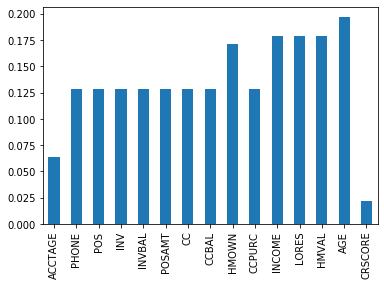

In [9]:
# Visualize percentage of nulls in each column
columns_with_null = ['ACCTAGE', 'PHONE', 'POS','INV','INVBAL','POSAMT', 'CC', 'CCBAL','HMOWN',
                    'CCPURC', 'INCOME', 'LORES', 'HMVAL', 'AGE','CRSCORE']

(df[columns_with_null].isna().sum() / len(df)).plot(kind='bar')


for col in columns_with_null:
    
    print('COLUMN:', col)
    print('percent of nulls:', df[col].isna().sum()/len(df)) 

## Columns containing missing values:

    ACCTAGE: Age of Oldest Account
    PHONE: Number of Telephone Bnaking
    POS: Number Point of Sale
    INV: Investment
    INVBAL: Investment Balance
    POSMAT: Amount Point of Sale
    CC: Credit Card
    CCBAL: Credit Card Balance
    HMOEN: Owns Home
    CCPURC: Credit Card Purchase
    INCOME: Income
    LORES: Length Of Residence
    HMVAL: Home Value
    AGE: Age
    CRSCORE: Credit Score

## Column-by-Column exploration and cleaning

In [35]:
columns_with_null = ['ACCTAGE', 'PHONE', 'POS','INV','INVBAL','POSAMT', 'CC', 'CCBAL','HMOWN',
                    'CCPURC', 'LORES', 'AGE','CRSCORE','HMVAL']

for col in columns_with_null:
    df[col].fillna(df[col].median(), inplace=True) # Impute null values with median

In [11]:
df.isna().sum(axis=0) 

ACCTAGE       0
DDA           0
DDABAL        0
DEP           0
DEPAMT        0
CASHBK        0
CHECKS        0
DIRDEP        0
NSF           0
NSFAMT        0
PHONE         0
TELLER        0
SAV           0
SAVBAL        0
ATM           0
ATMAMT        0
POS           0
POSAMT        0
CD            0
CDBAL         0
IRA           0
IRABAL        0
LOC           0
LOCBAL        0
INV           0
INVBAL        0
ILS           0
ILSBAL        0
MM            0
MMBAL         0
MMCRED        0
MTG           0
MTGBAL        0
CC            0
CCBAL         0
CCPURC        0
SDB           0
INCOME     5782
HMOWN         0
LORES         0
HMVAL         0
AGE           0
CRSCORE       0
MOVED         0
INAREA        0
INS           0
BRANCH        0
RES           0
dtype: int64

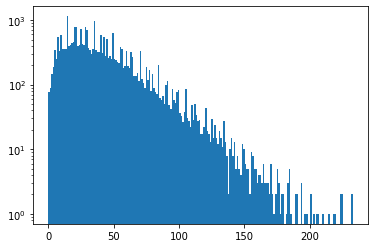

In [12]:
# Check the distribution of Income
plt.figure()
plt.hist(df['INCOME'], bins=200)
plt.yscale('log')
plt.show() 

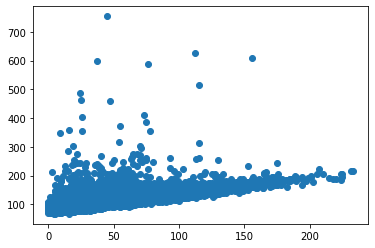

In [13]:
# Check the liner relationship between Income and Home Value. 
plt.figure()
plt.scatter(df['INCOME'],df['HMVAL']) 
plt.show()

The scatter plot shows these two variables do have positive correlation. So we will impute their null values based on their relative percentage values.

In [14]:
# Check INCOME as a proportion of HMVAL and get the median value
INC_pct = df['INCOME']/df['HMVAL'] 
INC_pct[np.isfinite(INC_pct)].median()  

0.31896551724137934

So based upon the above, we will impute INCOME that remain with ~0.319 * the HMVAL column.

In [38]:
# Impute the missing values of INCOME with the median of INC_pct
df.loc[df['INCOME'].isna(),'INCOME']=df.loc[df['INCOME'].isna(),'DDA']*0.319

In [39]:
# Check nulls in INCOME column. It shows we successfully impute the missing values in this column.
df['INCOME'].isna().sum(axis=0) 

0

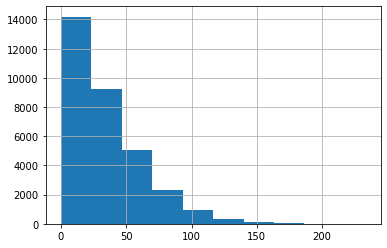

In [17]:
# Check the distribution of INCOME column again after imputation
df['INCOME'].hist()
#plt.yscale('log')

In [18]:
# Make sure there is no more nulls in each column 
df.isna().sum(axis=0) 

ACCTAGE    0
DDA        0
DDABAL     0
DEP        0
DEPAMT     0
CASHBK     0
CHECKS     0
DIRDEP     0
NSF        0
NSFAMT     0
PHONE      0
TELLER     0
SAV        0
SAVBAL     0
ATM        0
ATMAMT     0
POS        0
POSAMT     0
CD         0
CDBAL      0
IRA        0
IRABAL     0
LOC        0
LOCBAL     0
INV        0
INVBAL     0
ILS        0
ILSBAL     0
MM         0
MMBAL      0
MMCRED     0
MTG        0
MTGBAL     0
CC         0
CCBAL      0
CCPURC     0
SDB        0
INCOME     0
HMOWN      0
LORES      0
HMVAL      0
AGE        0
CRSCORE    0
MOVED      0
INAREA     0
INS        0
BRANCH     0
RES        0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32264 entries, 0 to 32263
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  32264 non-null  float64
 1   DDA      32264 non-null  int64  
 2   DDABAL   32264 non-null  float64
 3   DEP      32264 non-null  int64  
 4   DEPAMT   32264 non-null  float64
 5   CASHBK   32264 non-null  int64  
 6   CHECKS   32264 non-null  int64  
 7   DIRDEP   32264 non-null  int64  
 8   NSF      32264 non-null  int64  
 9   NSFAMT   32264 non-null  float64
 10  PHONE    32264 non-null  float64
 11  TELLER   32264 non-null  int64  
 12  SAV      32264 non-null  int64  
 13  SAVBAL   32264 non-null  float64
 14  ATM      32264 non-null  int64  
 15  ATMAMT   32264 non-null  float64
 16  POS      32264 non-null  float64
 17  POSAMT   32264 non-null  float64
 18  CD       32264 non-null  int64  
 19  CDBAL    32264 non-null  int64  
 20  IRA      32264 non-null  int64  
 21  IRABAL   322

The only two non-numeric columns are RES and BRANCH.

In [23]:
avg = round(df['INS'].mean(), 2) 
avg

0.35

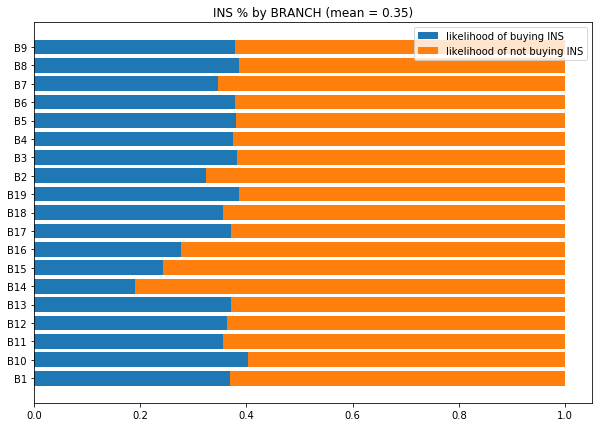

In [24]:
# Get count of INS for each BRANCH
totals = df.groupby('BRANCH')['INS'].count() # two columns are hierarchical
pos_counts = df.groupby('BRANCH')['INS'].sum()

# Use these to calculate the %-INS
pos_pcts = pos_counts / totals
neg_pcts = 1 - pos_pcts

# Plot these on a stacked bar chart
plt.figure(figsize=(10,7))
plt.barh(pos_pcts.index, pos_pcts.values, label='likelihood of buying INS')
plt.barh(neg_pcts.index, neg_pcts.values, label='likelihood of not buying INS',
        left=pos_pcts) # neg_pcts bars have their leftmost point where the pos_pcts end
plt.title(f'INS % by BRANCH (mean = {avg})')
plt.legend()
plt.show()

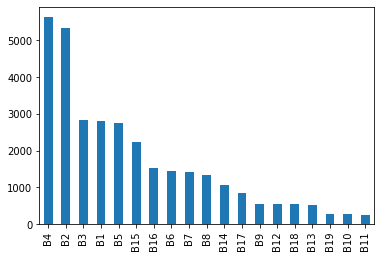

B4     5633
B2     5345
B3     2844
B1     2819
B5     2752
B15    2235
B16    1534
B6     1438
B7     1413
B8     1341
B14    1072
B17     850
B9      558
B12     549
B18     541
B13     535
B19     285
B10     273
B11     247
Name: BRANCH, dtype: int64

In [25]:
# Check the distribution of BRANCH values
df['BRANCH'].value_counts().plot(kind='bar') 
plt.show()

display(df['BRANCH'].value_counts())

BRANCH has almost 20 imbalanced values. In this project, we don't care about which branch has the most powerful predictive power so we drop variable BRANCH. INS is the target variable, so we need to drop it since this is a clustering problem and we don't predict anything but try to find the underlying pattern of the data points.

In [27]:
# dropping BRANCH 
df.drop(['BRANCH'], axis=1, inplace=True)

Let's encode categorical variable RES with numeric labels.

In [28]:
# Check unique values of RES column
df['RES'].unique()

array(['R', 'S', 'U'], dtype=object)

In [29]:
# Replace values in the RES column with 1,2,3
df['RES'].replace({'R':1, 'S':2, 'U':3}, inplace=True)

In [30]:
# Check again
df['RES'].unique()

array([1, 2, 3])

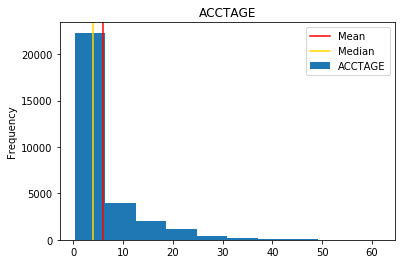

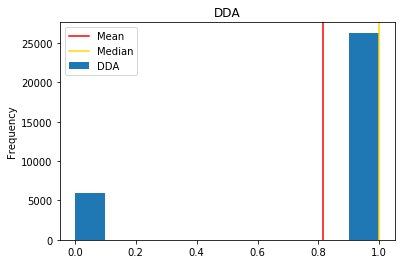

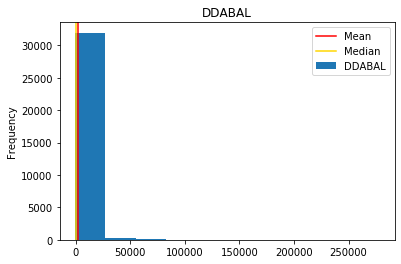

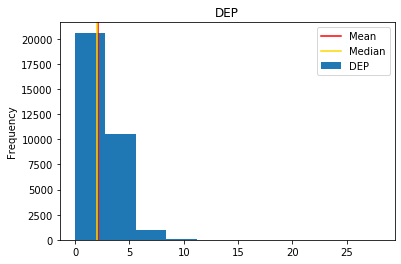

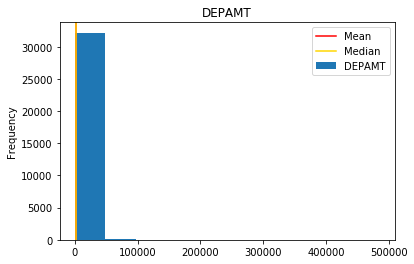

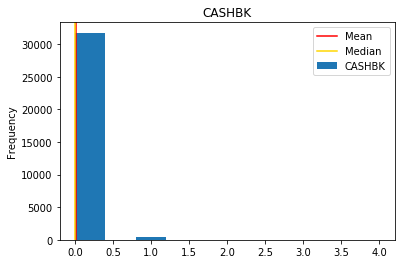

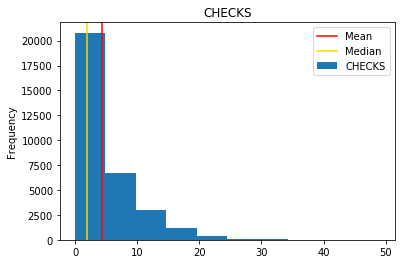

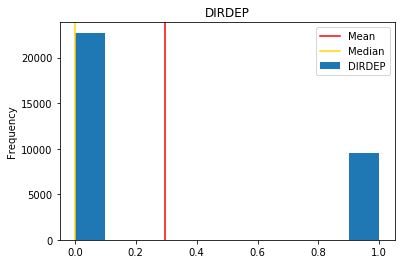

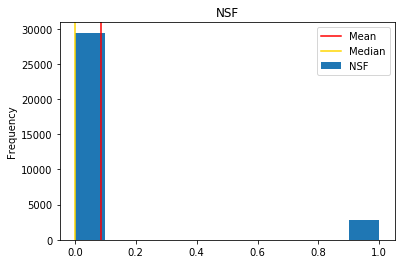

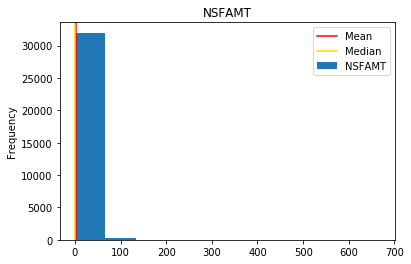

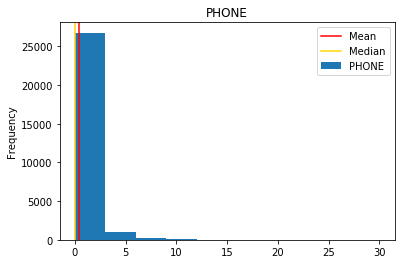

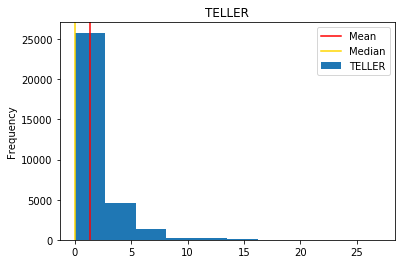

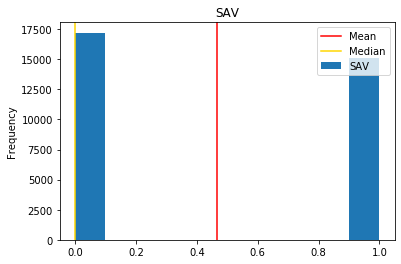

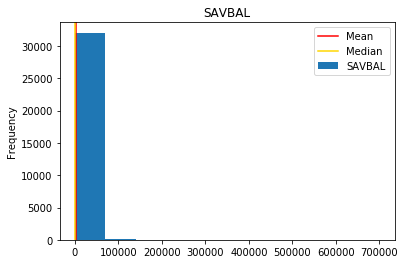

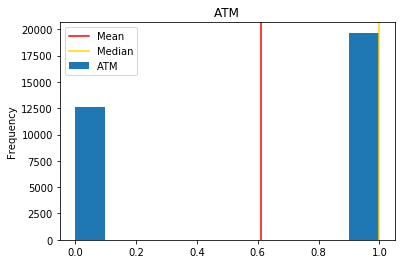

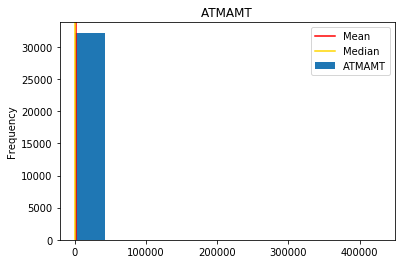

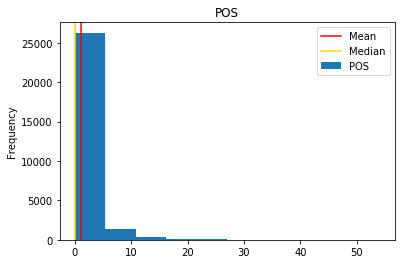

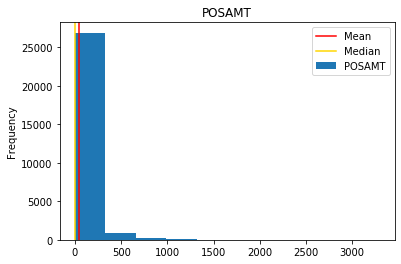

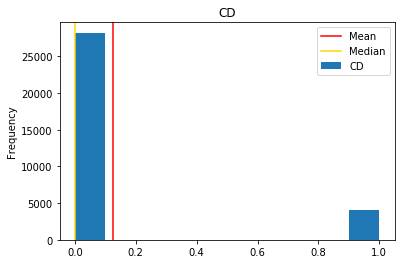

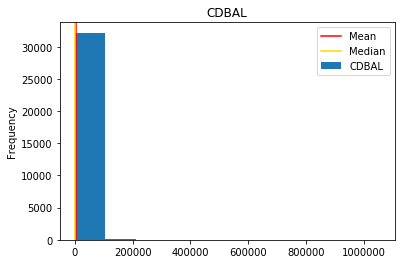

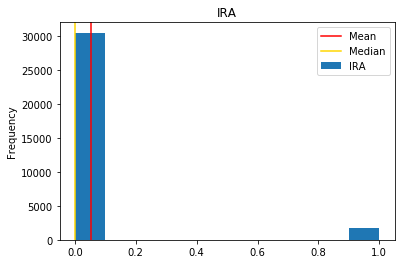

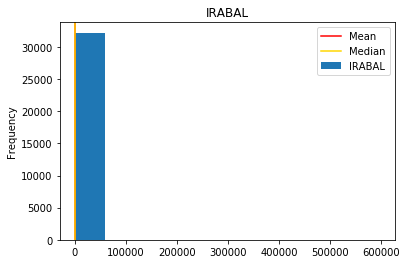

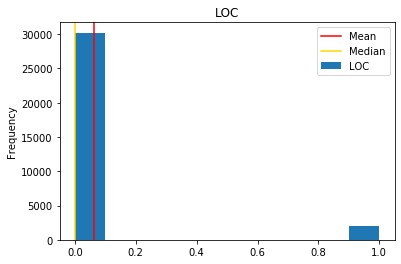

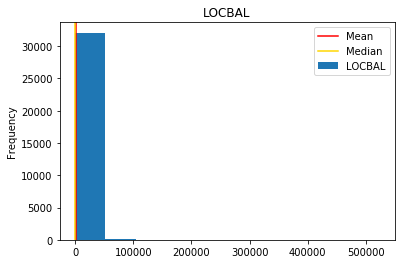

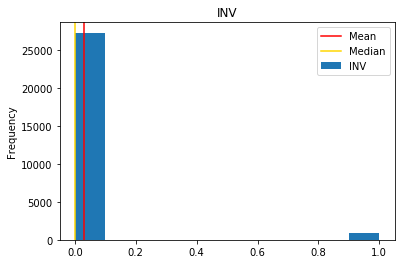

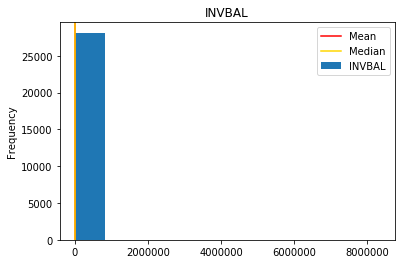

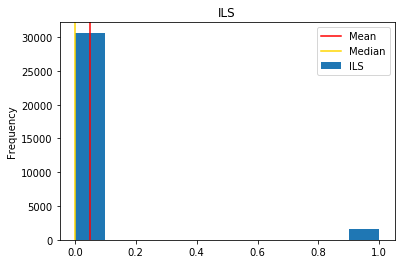

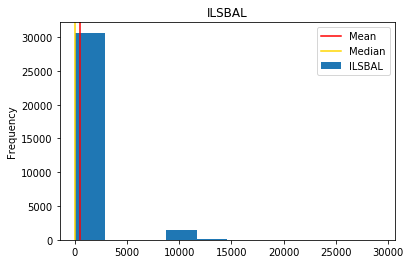

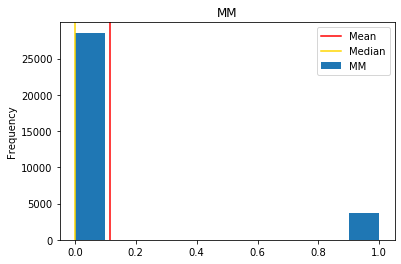

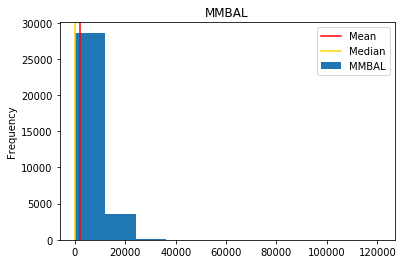

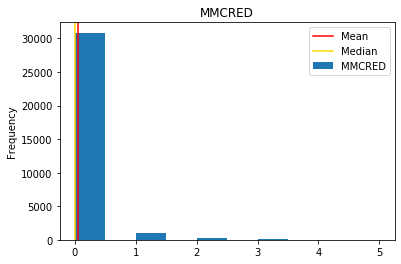

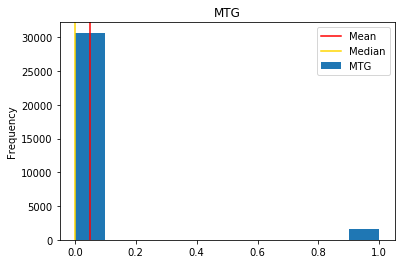

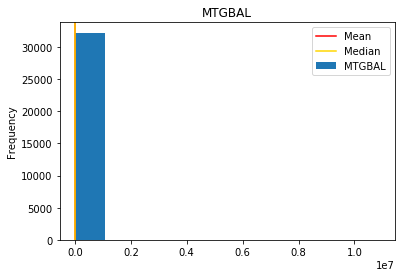

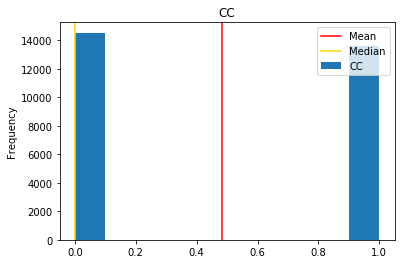

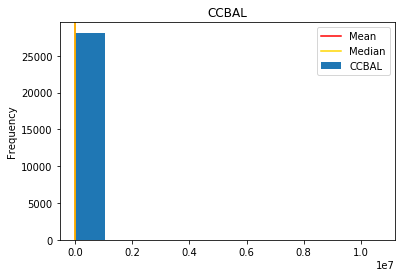

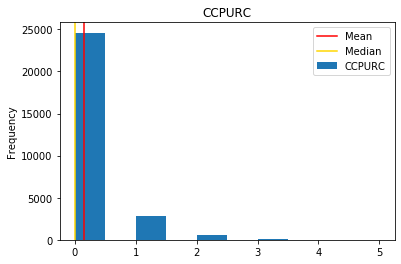

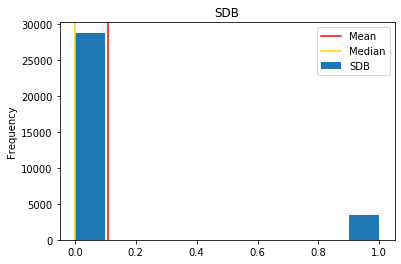

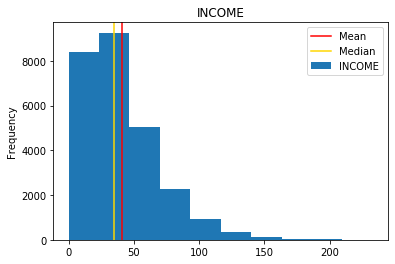

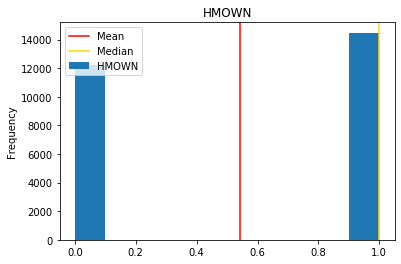

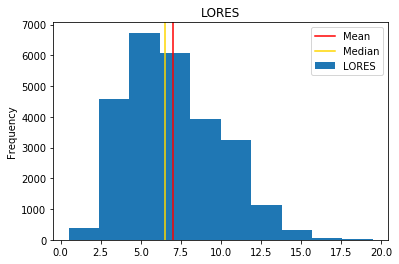

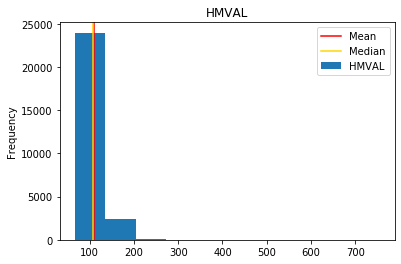

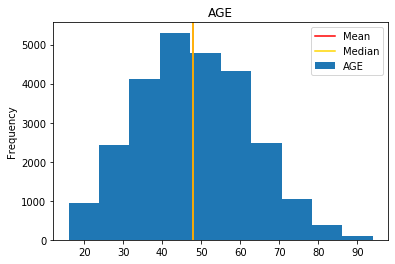

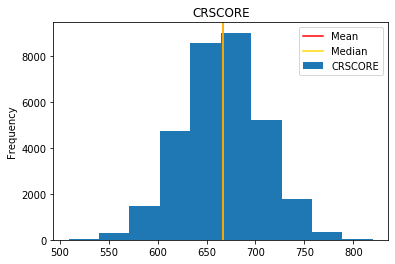

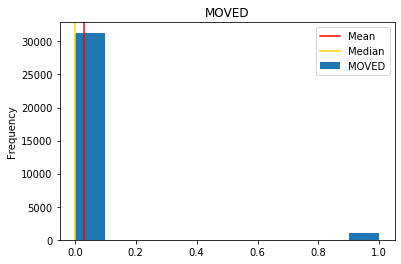

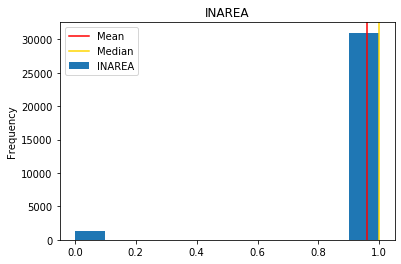

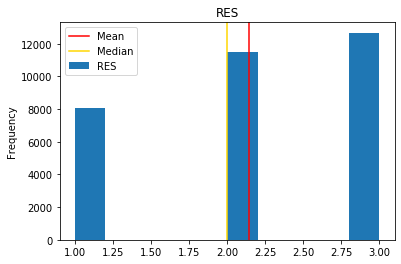

In [31]:
# Check distributions of all columns
num_columns = ['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
              'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
              'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
              'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
              'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
              'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA','RES']

for col in num_columns:
    df[col].plot(kind='hist')
    plt.axvline(df[col].mean(), c='r', label='Mean') 
    plt.axvline(df[col].median(), c='gold', label='Median')
    plt.title(col)
    plt.legend()
    plt.show()
    

Looking at the data we can see that the data that only a few of our numeric columns follow a normal distribution. This in itself is not a major issue for our modelling process. Usually having a normal distribution of features translates well to well behaved errors but its not a hard requirement.

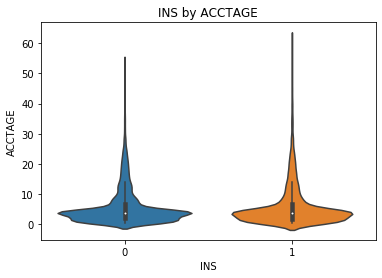

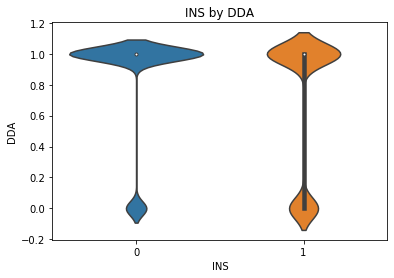

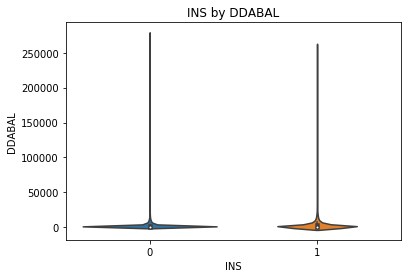

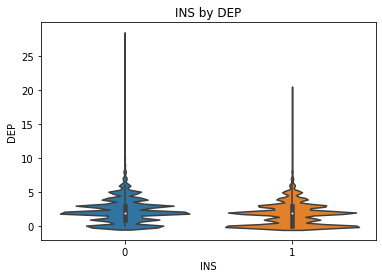

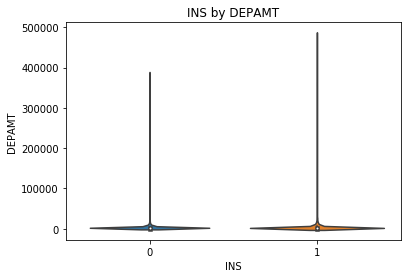

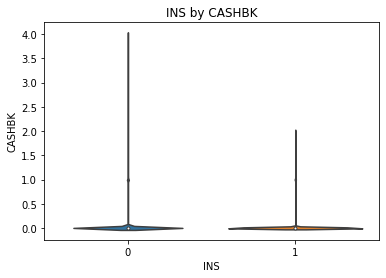

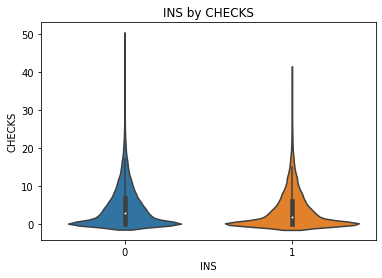

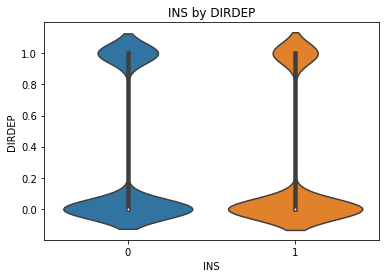

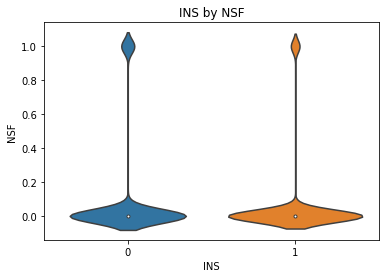

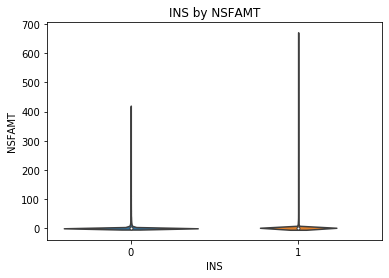

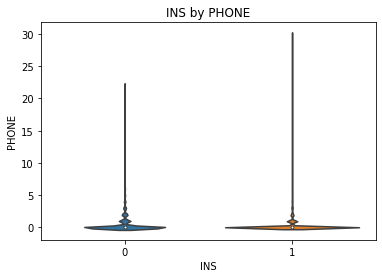

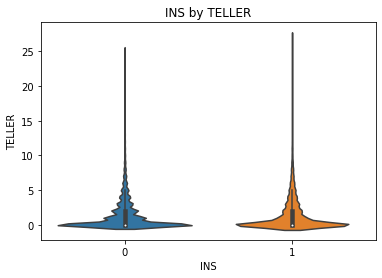

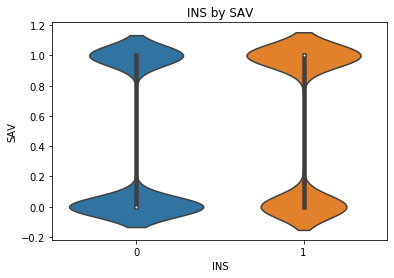

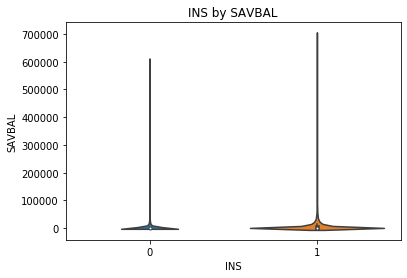

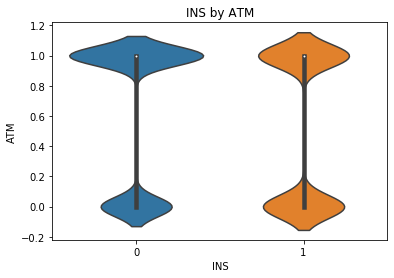

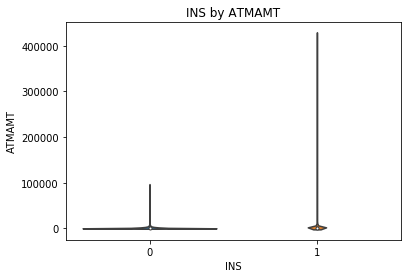

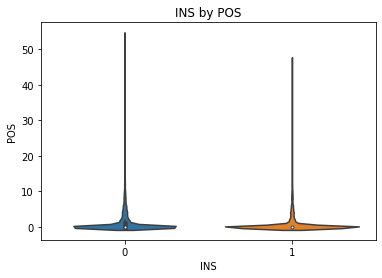

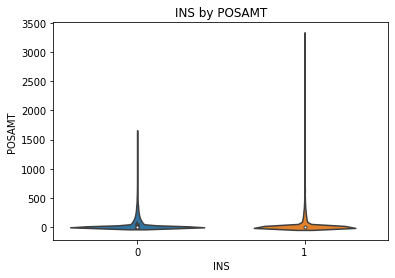

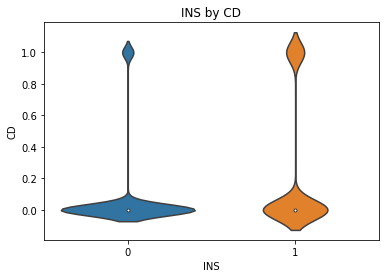

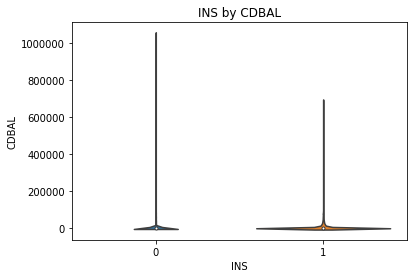

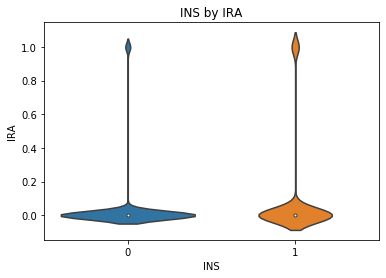

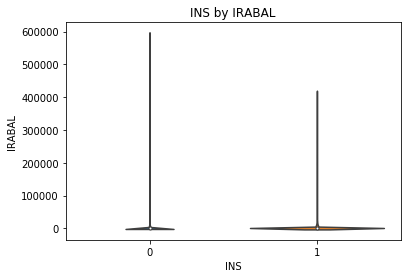

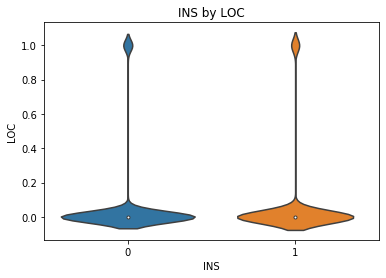

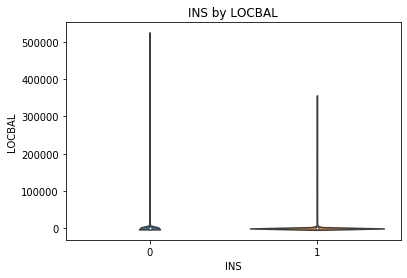

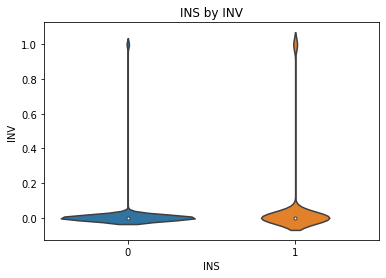

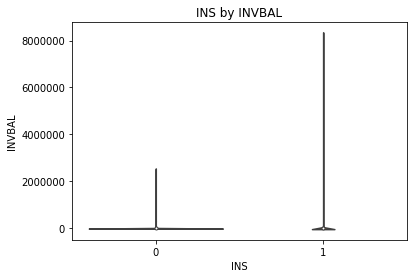

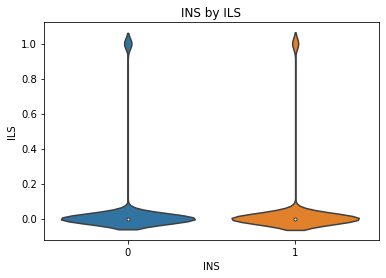

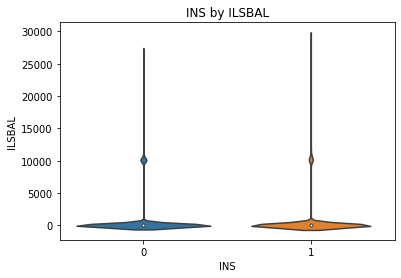

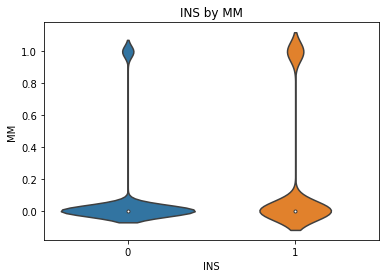

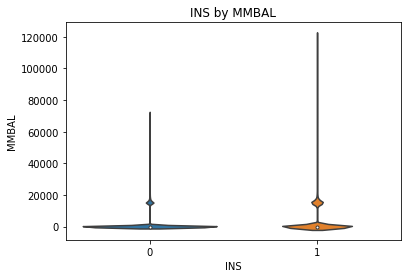

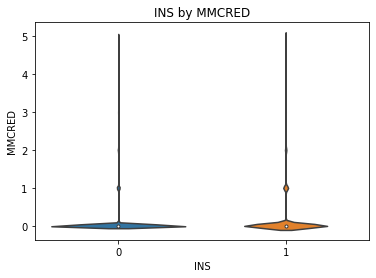

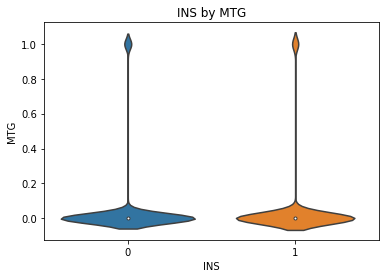

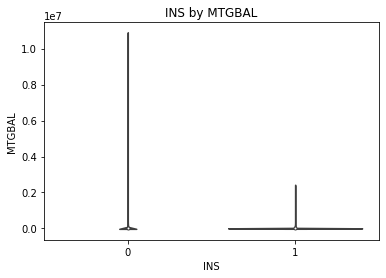

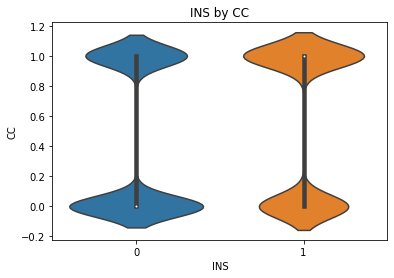

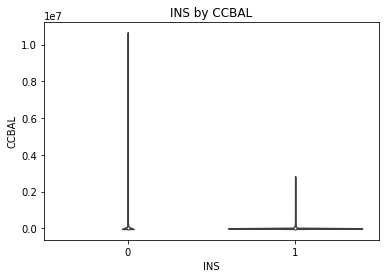

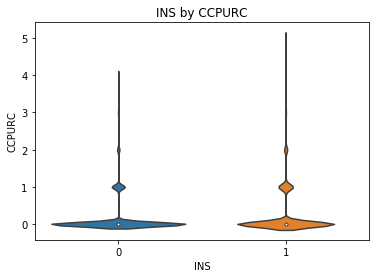

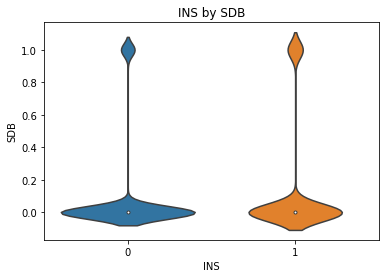

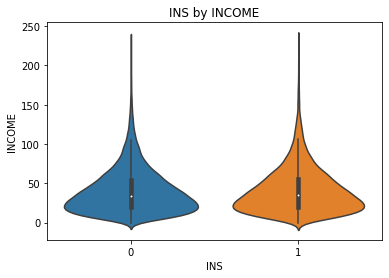

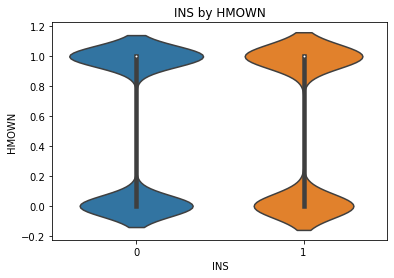

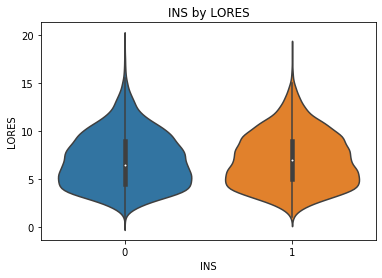

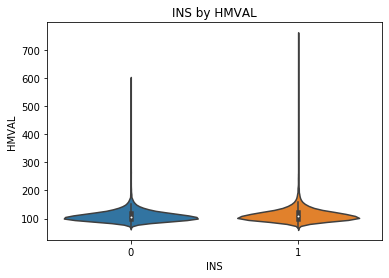

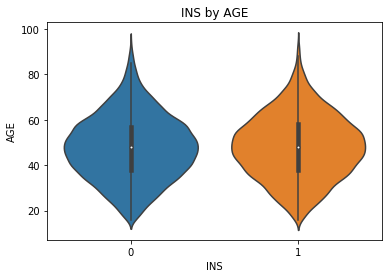

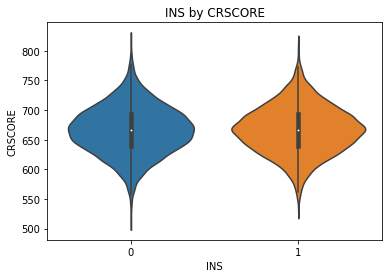

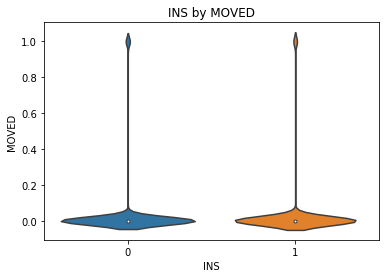

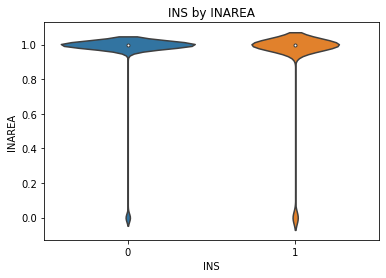

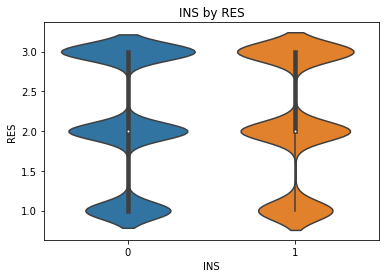

In [32]:
# Check 
num_columns = ['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
       'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
       'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
       'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
       'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
       'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA','RES']

for col in num_columns:
    
    sns.violinplot(y=col, x='INS', data=df)
    plt.title(f'INS by {col}')
    plt.show()
    

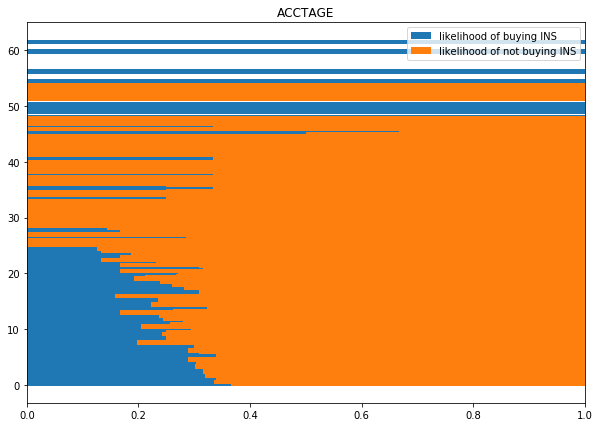

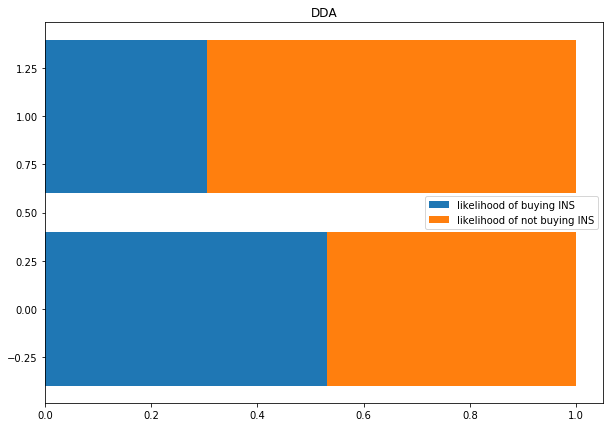

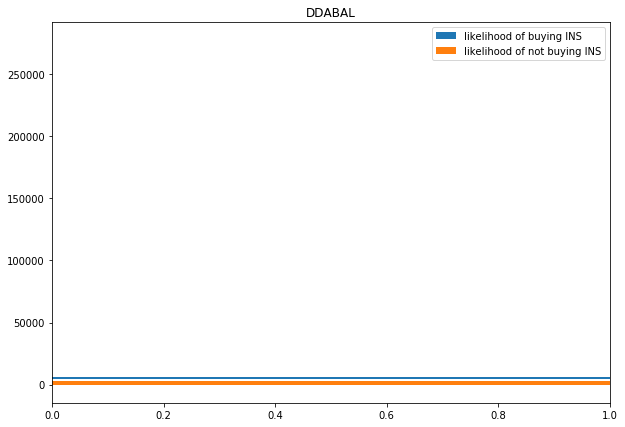

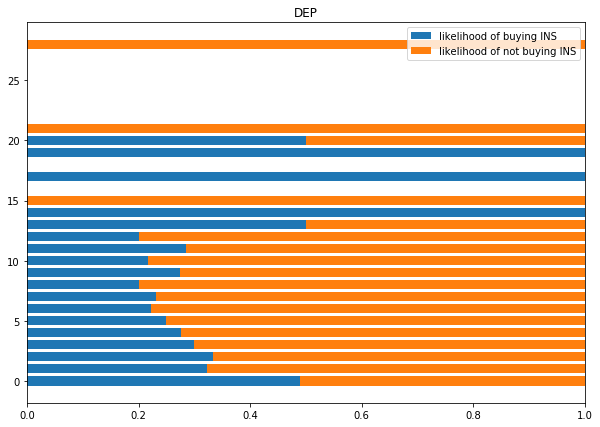

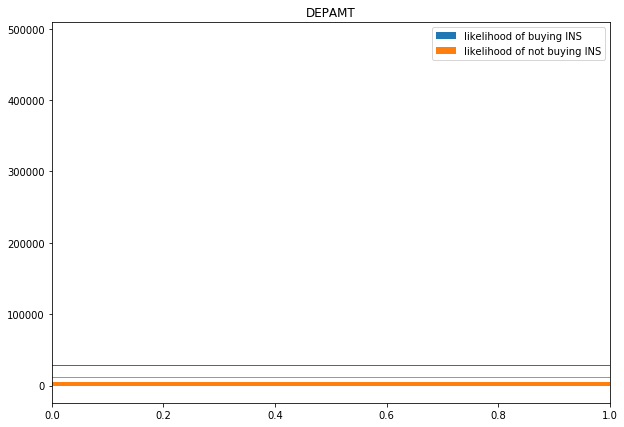

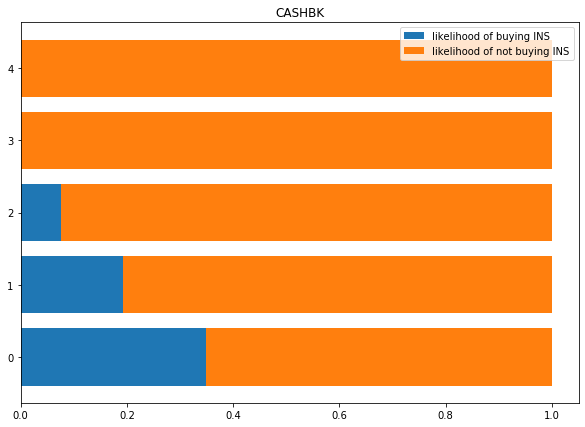

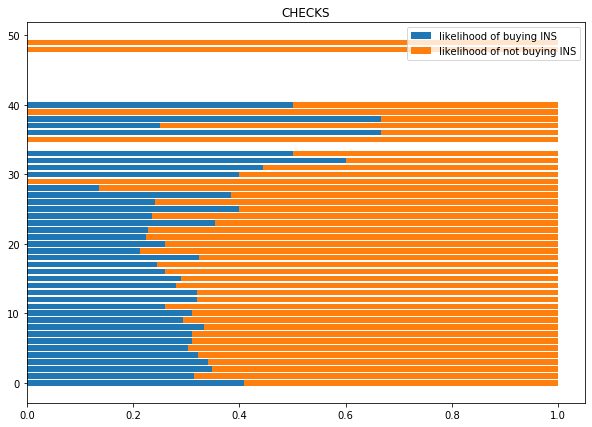

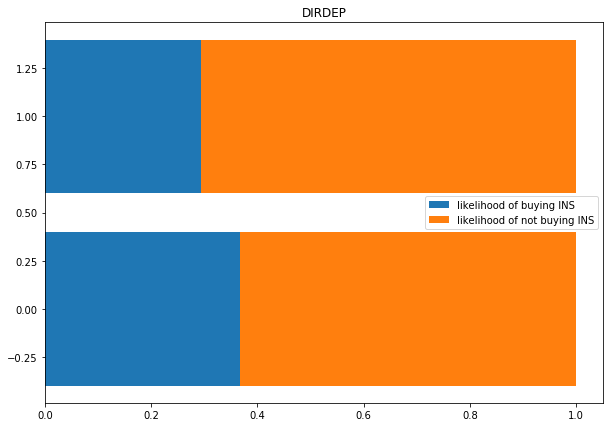

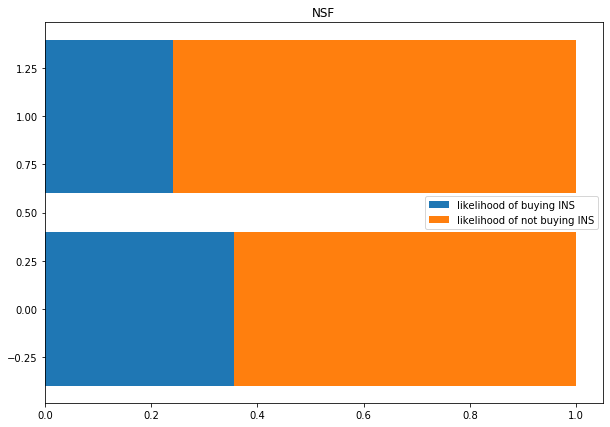

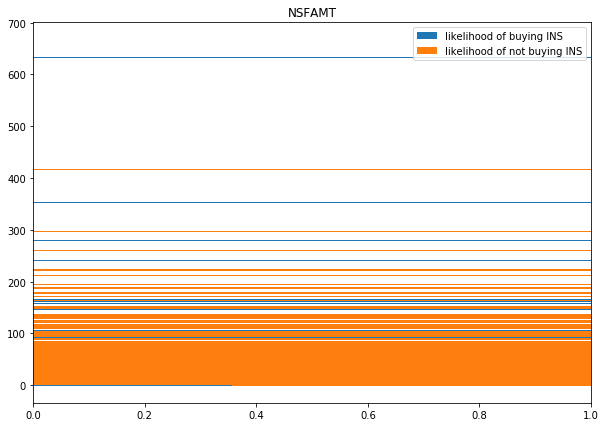

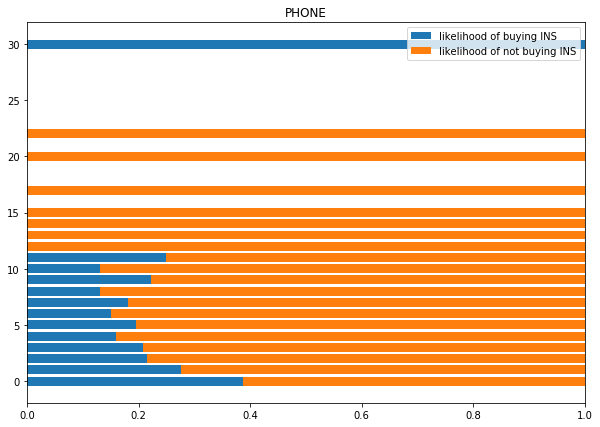

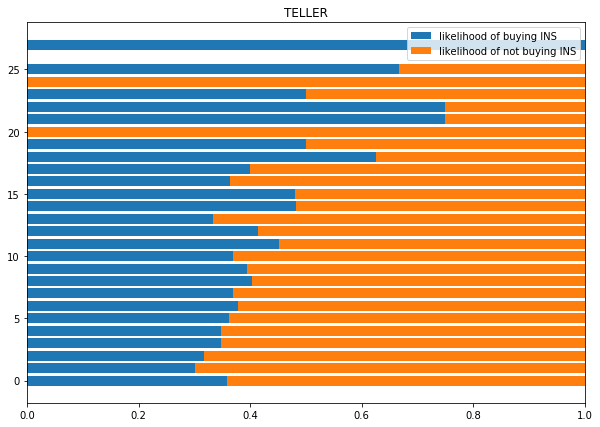

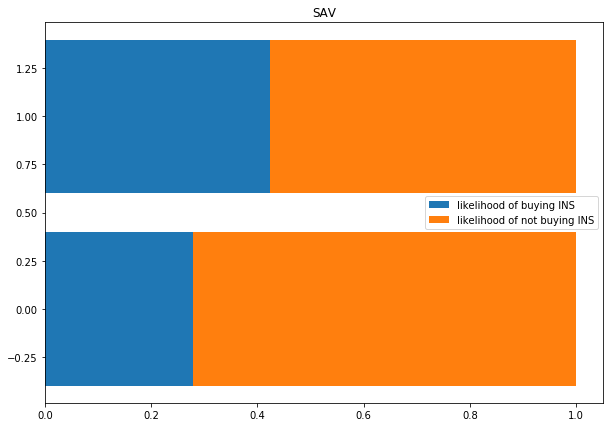

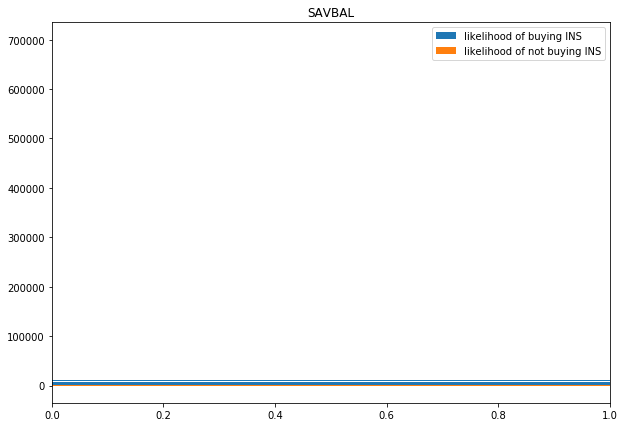

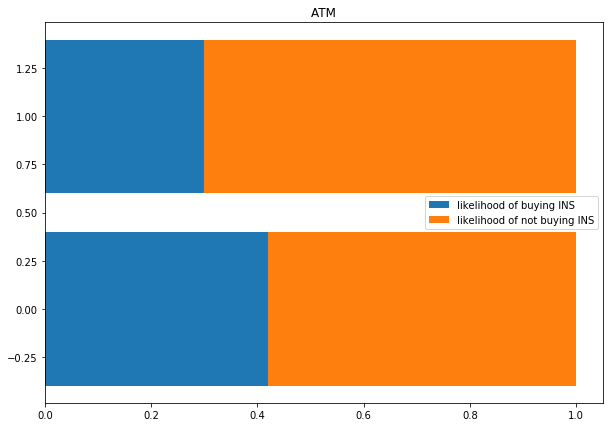

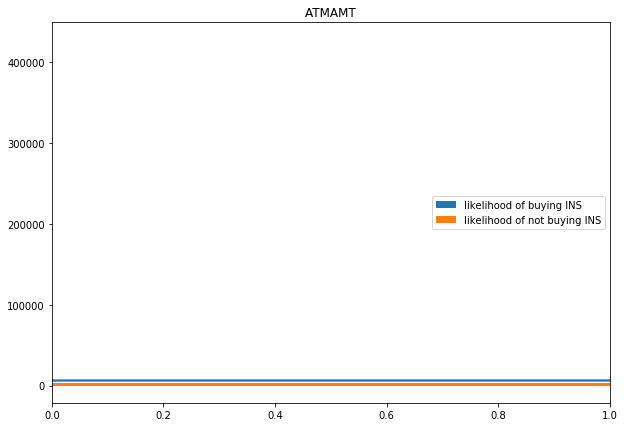

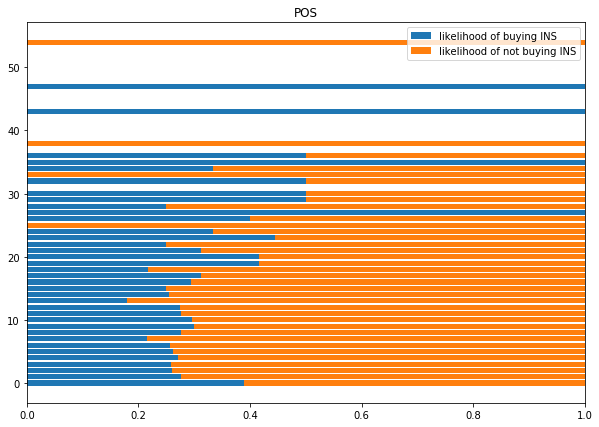

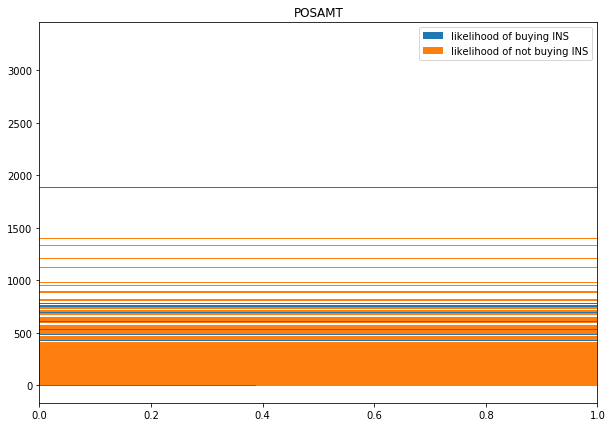

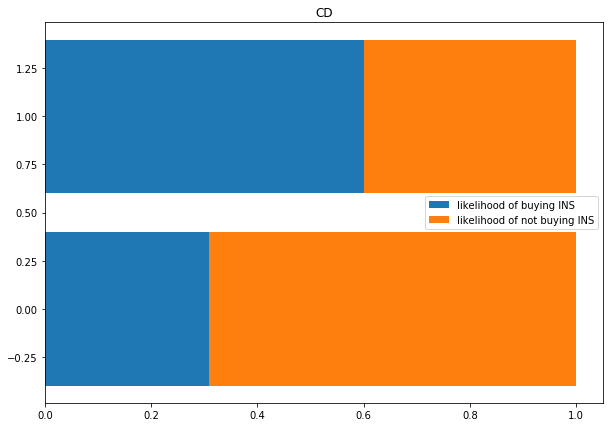

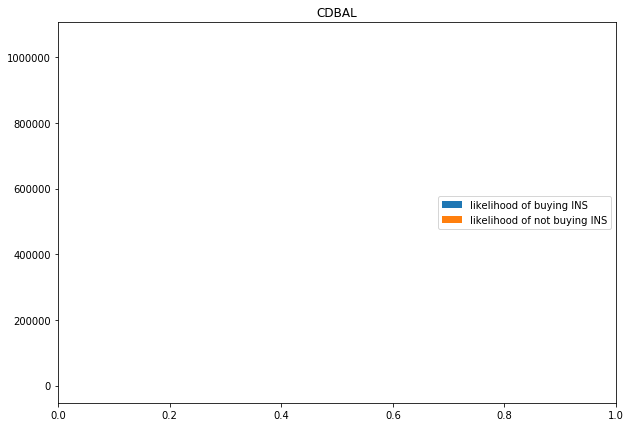

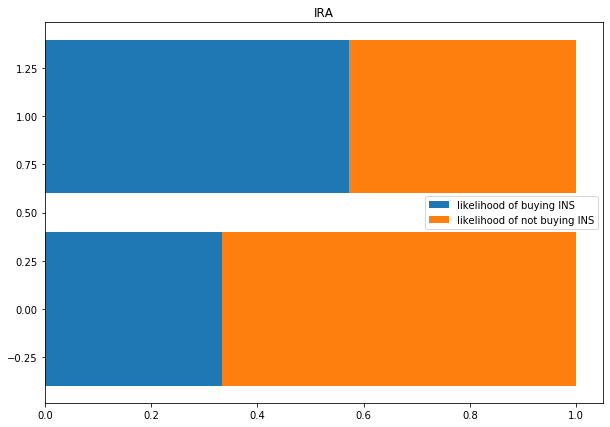

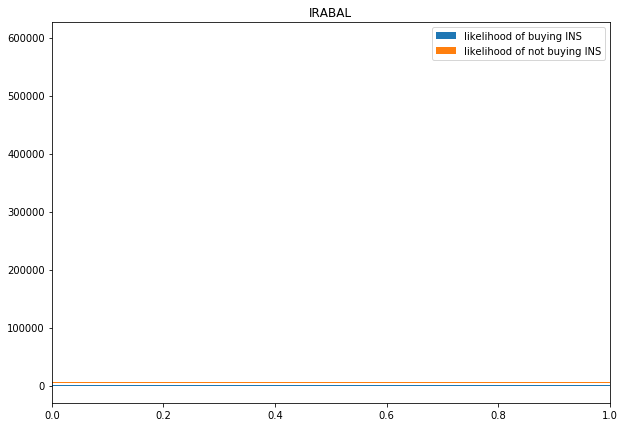

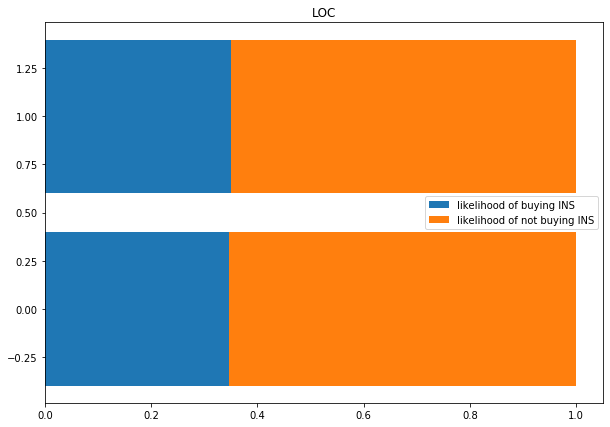

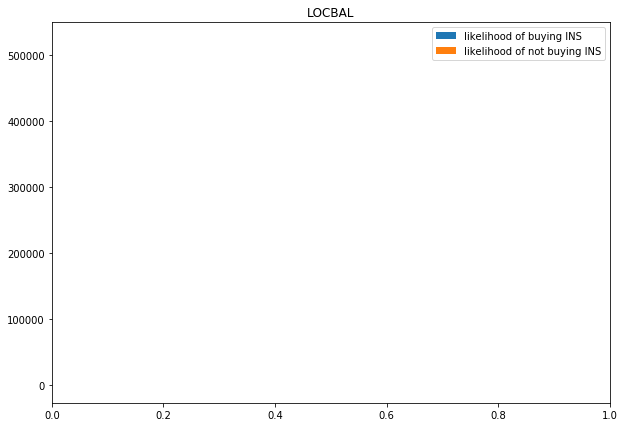

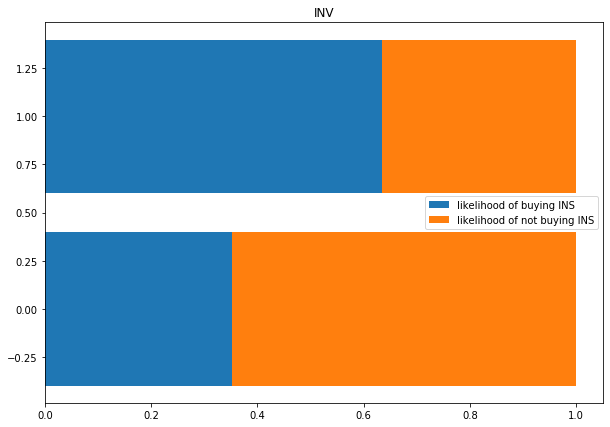

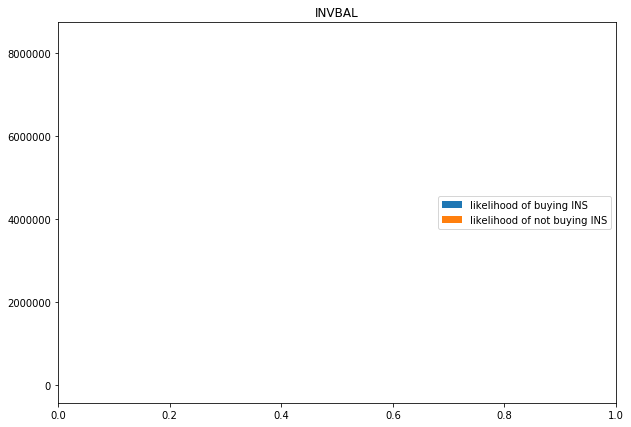

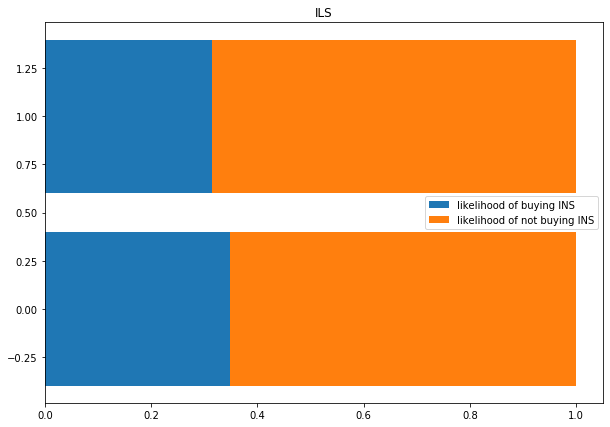

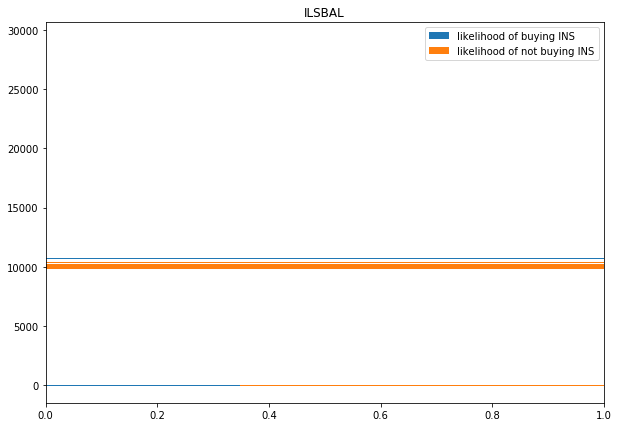

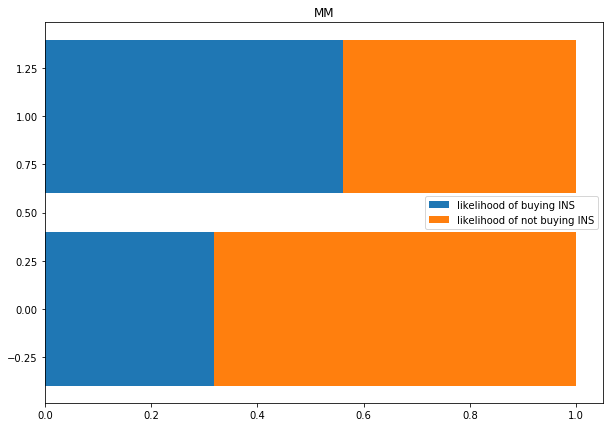

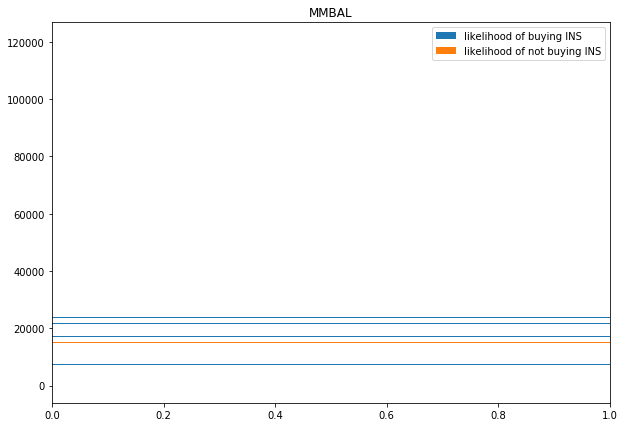

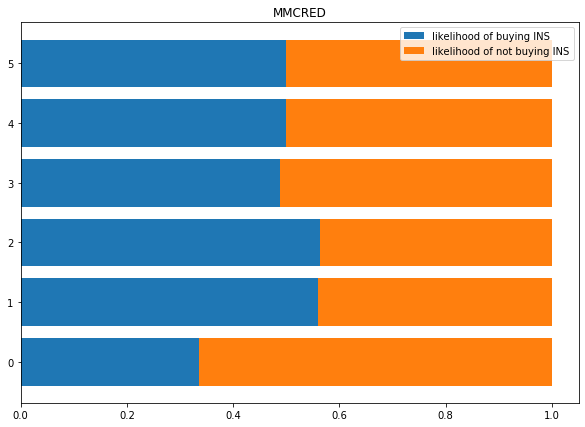

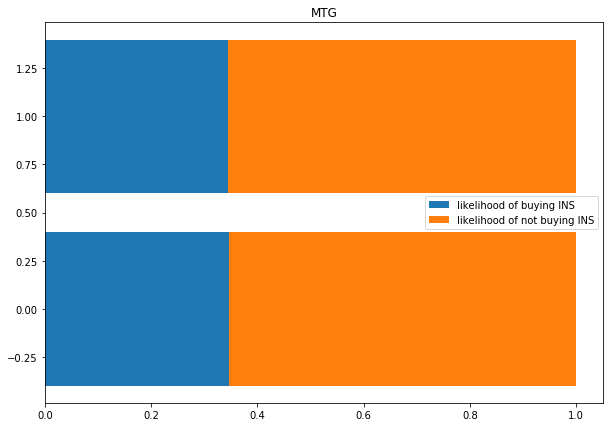

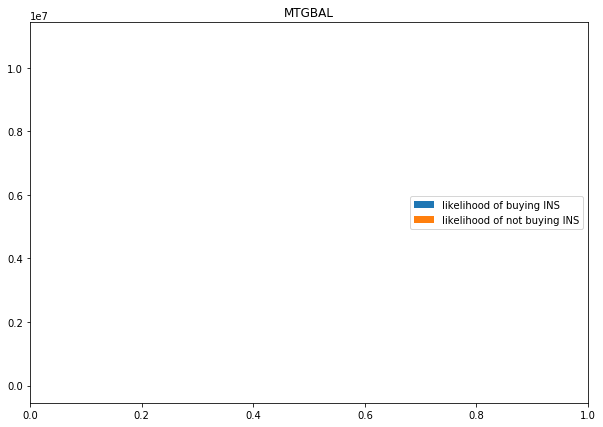

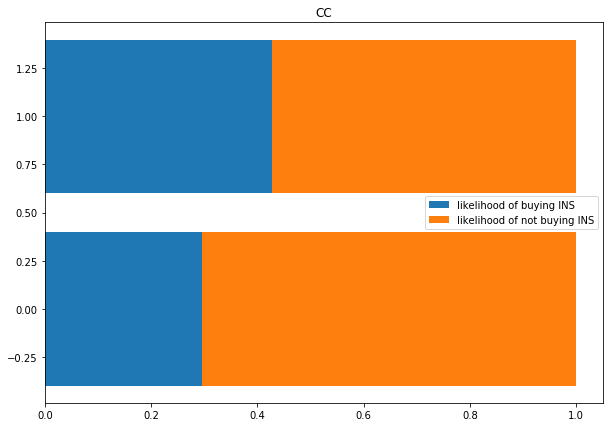

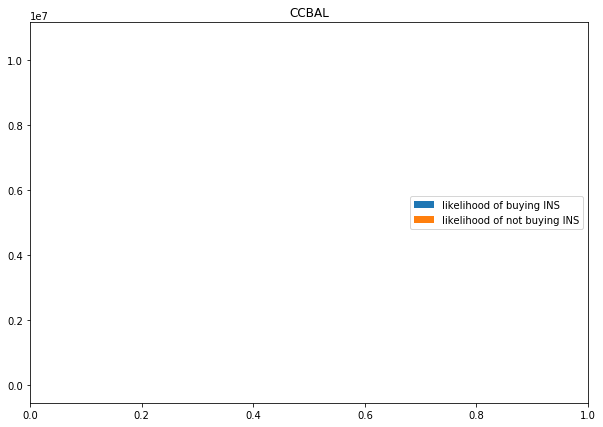

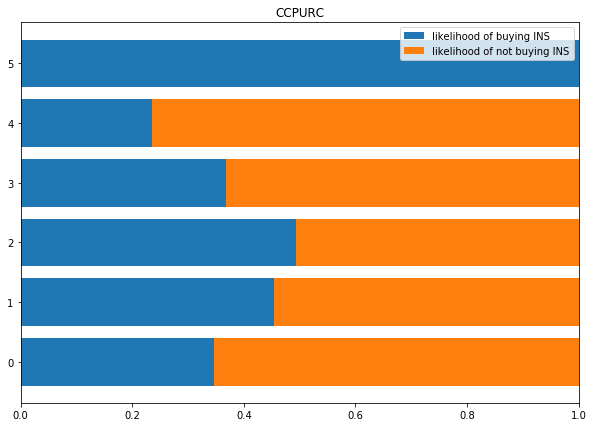

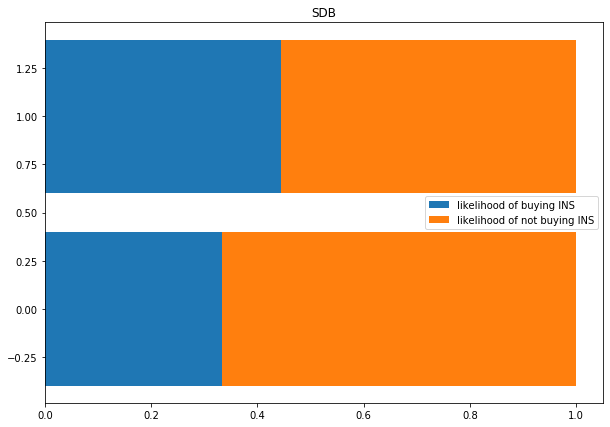

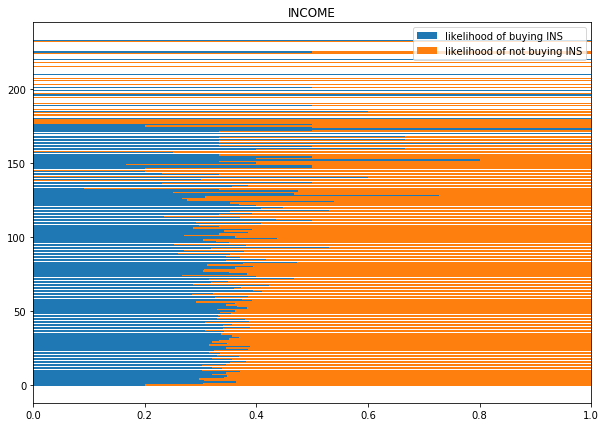

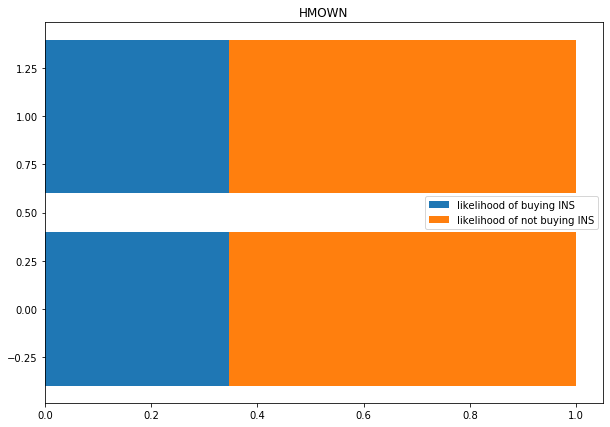

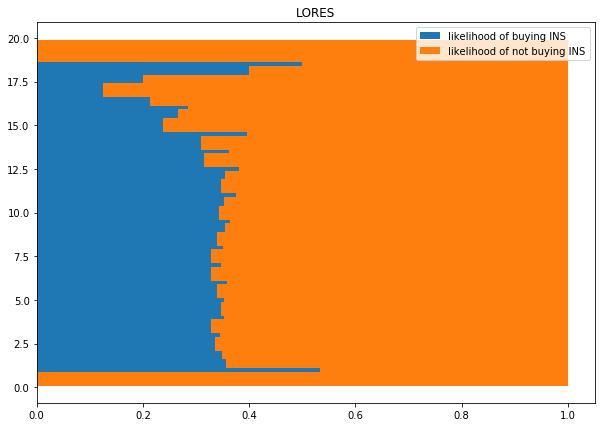

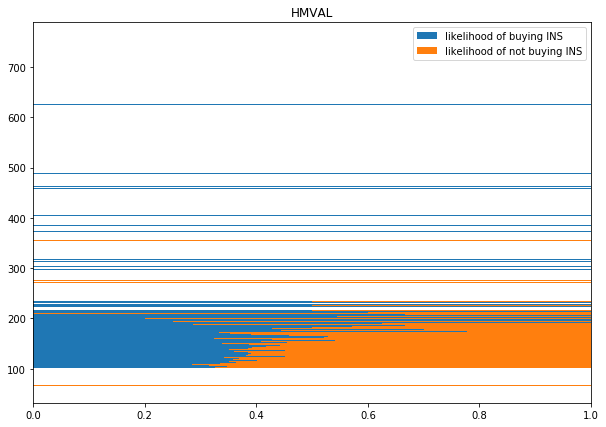

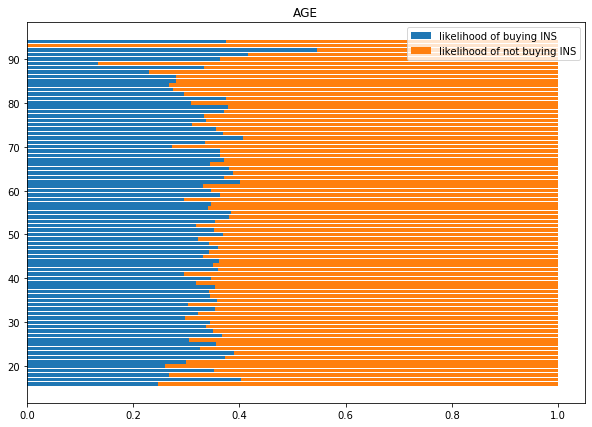

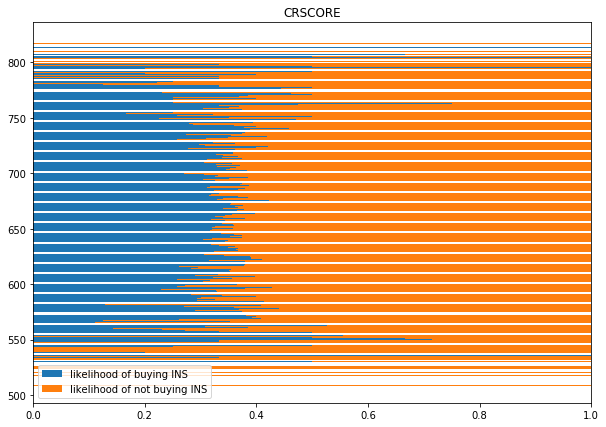

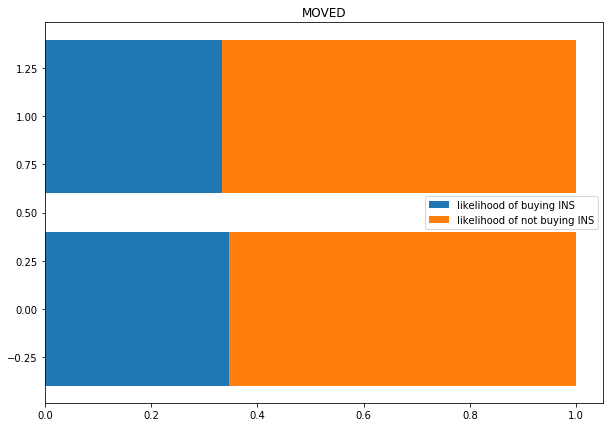

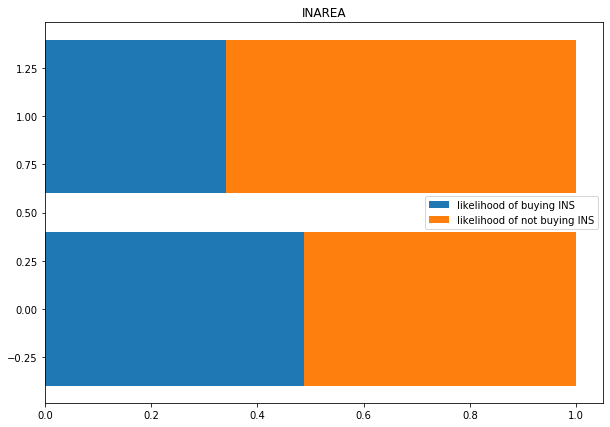

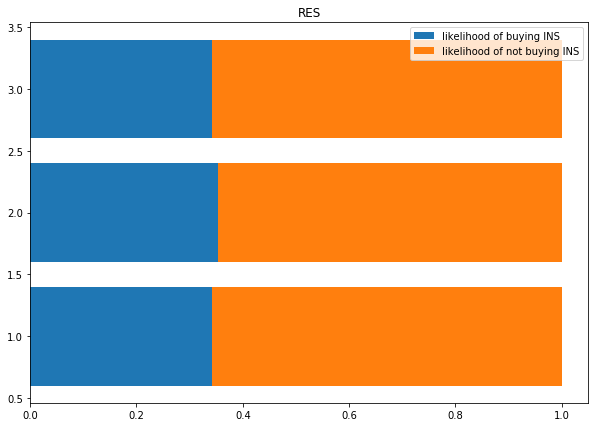

In [33]:
# Get count of INS for each col

for col in num_columns:
    totals = df.groupby(col)['INS'].count() # two columns are hierarchical
    pos_counts = df.groupby(col)['INS'].sum()

     # Use these to calculate the %-INS
    pos_pcts = pos_counts / totals
    neg_pcts = 1 - pos_pcts

     # Plot these on a stacked bar chart
    plt.figure(figsize=(10,7))
    plt.barh(pos_pcts.index, pos_pcts.values, label='likelihood of buying INS')
    plt.barh(neg_pcts.index, neg_pcts.values, label='likelihood of not buying INS',
    left=pos_pcts) # neg_pcts bars have their leftmost point where the pos_pcts end
    #plt.title(f'INS % by col (mean = {avg})')
    #plt.title(f'INS %'{}'.format(col))
    plt.title('{}'.format(col))
    plt.legend()
    plt.show()

## Part 2 : Modeling

In [40]:
# Check missing values again
df.isna().sum(axis=0) 

ACCTAGE    0
DDA        0
DDABAL     0
DEP        0
DEPAMT     0
CASHBK     0
CHECKS     0
DIRDEP     0
NSF        0
NSFAMT     0
PHONE      0
TELLER     0
SAV        0
SAVBAL     0
ATM        0
ATMAMT     0
POS        0
POSAMT     0
CD         0
CDBAL      0
IRA        0
IRABAL     0
LOC        0
LOCBAL     0
INV        0
INVBAL     0
ILS        0
ILSBAL     0
MM         0
MMBAL      0
MMCRED     0
MTG        0
MTGBAL     0
CC         0
CCBAL      0
CCPURC     0
SDB        0
INCOME     0
HMOWN      0
LORES      0
HMVAL      0
AGE        0
CRSCORE    0
MOVED      0
INAREA     0
INS        0
RES        0
dtype: int64

In [41]:
# Set up X (independent variables) and y (target variable)
X = df.drop('INS', axis=1)
y = df['INS']

# Print shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (32264, 46)
Shape of y: (32264,)


In [42]:
# Check the class proportions to see if two classes are balanced
y.value_counts()/len(df)

0    0.653639
1    0.346361
Name: INS, dtype: float64

In [43]:
# Split the data into remainder and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The test set has {len(X_test)} data points.')

The train set has 25811 data points.
The test set has 6453 data points.


## Logistic Regression

In [44]:
df.isna().sum(axis=0) 

ACCTAGE    0
DDA        0
DDABAL     0
DEP        0
DEPAMT     0
CASHBK     0
CHECKS     0
DIRDEP     0
NSF        0
NSFAMT     0
PHONE      0
TELLER     0
SAV        0
SAVBAL     0
ATM        0
ATMAMT     0
POS        0
POSAMT     0
CD         0
CDBAL      0
IRA        0
IRABAL     0
LOC        0
LOCBAL     0
INV        0
INVBAL     0
ILS        0
ILSBAL     0
MM         0
MMBAL      0
MMCRED     0
MTG        0
MTGBAL     0
CC         0
CCBAL      0
CCPURC     0
SDB        0
INCOME     0
HMOWN      0
LORES      0
HMVAL      0
AGE        0
CRSCORE    0
MOVED      0
INAREA     0
INS        0
RES        0
dtype: int64

In [45]:
# Using pipeline and grid search to do Scale, Dimension Reduction and Hyperparameterization
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline for Logistic Regression 
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

# Try a range of C values 
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Parameter grid
logreg_param_grid = [
    
    # l1 without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l1 with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(random_state=1,n_jobs=-1)],
     'model__C': c_values}
]

In [46]:
# Instantiate the log reg grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=5)

# Fit the log reg grid search
fitted_logreg_gs = logreg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  3.5min finished


In [47]:
fitted_logreg_gs.best_estimator_

Pipeline(memory='/var/folders/4m/bqgz9wb15jj793lyl_y609m80000gn/T/tmpp28e65li',
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_reducer', None),
                ('model',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l2',
                                    random_state=1, solver='lbfgs', tol=0.0001,
                                    verbose=0, warm_start=False))],
         verbose=False)

In [48]:
# Print the accuracies
print(f"The best logistic regression's accuracy on the train set: {fitted_logreg_gs.score(X_train, y_train)}")
print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

The best logistic regression's accuracy on the train set: 0.7272480725272171
The best logistic regression's accuracy on the test set: 0.7215248721524872


In [49]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = fitted_logreg_gs.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
prob_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'])
prob_df.index=['Actual 0', 'Actual 1'] 
prob_df


Predicted 0  Predicted 1
Actual 0         3779          439
Actual 1         1358          877

     • Correctly predicted class 0: 3781
     • Incorrectly predicted class 0: 1359
     • Incorrectly predicted class 1: 437
     • Correctly predicted class 1: 876

In [50]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      4218
           1       0.67      0.39      0.49      2235

    accuracy                           0.72      6453
   macro avg       0.70      0.64      0.65      6453
weighted avg       0.71      0.72      0.70      6453



In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Classification report for a threshold of default 0.5 \n')
print('Accuracy Score for Test data:', accuracy_score(y_test, y_pred))
print('Precision Score for Test data:', precision_score(y_test, y_pred))
print('Recall Score for Test data:', recall_score(y_test, y_pred))
print('F1 Score for Test data:', f1_score(y_test, y_pred))

Classification report for a threshold of default 0.5 

Accuracy Score for Test data: 0.7215248721524872
Precision Score for Test data: 0.6664133738601824
Recall Score for Test data: 0.39239373601789707
F1 Score for Test data: 0.4939453675021121


**Conclusion:**

Recall : 39% of data points that our model correctly classified as class 1 among all the data points that belong to the class 1. That is low! 

Precision: 67% of data points that our model correctly classified as class 1 among the number of data points that we either correctly or incorrectly classified as class 1.
 


In [52]:
# Get probabilities using the test set
probabilities = fitted_logreg_gs.predict_proba(X_test)

# Check
probabilities

array([[0.91006017, 0.08993983],
       [0.44110279, 0.55889721],
       [0.73875872, 0.26124128],
       ...,
       [0.80876725, 0.19123275],
       [0.36642272, 0.63357728],
       [0.77050103, 0.22949897]])

In [53]:
# Put it into a dataframe
prob_df = pd.DataFrame(probabilities, columns=['probability of being class 0', 'probability of being class 1'])
prob_df

probability of being class 0  probability of being class 1
0                         0.910060                      0.089940
1                         0.441103                      0.558897
2                         0.738759                      0.261241
3                         0.634581                      0.365419
4                         0.669552                      0.330448
...                            ...                           ...
6448                      0.003571                      0.996429
6449                      0.394493                      0.605507
6450                      0.808767                      0.191233
6451                      0.366423                      0.633577
6452                      0.770501                      0.229499

[6453 rows x 2 columns]

In [54]:
# Look at just the column for class 1
y_proba = probabilities[:, 1]

# Can put in a dataframe
pd.DataFrame(y_proba, columns=['probability of being class 1'])

probability of being class 1
0                         0.089940
1                         0.558897
2                         0.261241
3                         0.365419
4                         0.330448
...                            ...
6448                      0.996429
6449                      0.605507
6450                      0.191233
6451                      0.633577
6452                      0.229499

[6453 rows x 1 columns]

So let's lower the threshold to increase recall and capture more members of the positive class.

In [55]:
import numpy as np

# If the probability that a data point belongs to the positive class is greater than 0.2, it gets classified as 1; otherwise, it gets classified as 0
y_pred_20 = np.where(y_proba > 0.2, 1, 0)

print('Classification report for a threshold of 0.2 \n')
print(classification_report(y_test, y_pred_20))

Classification report for a threshold of 0.2 

              precision    recall  f1-score   support

           0       0.88      0.38      0.53      4218
           1       0.43      0.90      0.59      2235

    accuracy                           0.56      6453
   macro avg       0.66      0.64      0.56      6453
weighted avg       0.72      0.56      0.55      6453



Recall does increase from 0.39 to 0.90.

In [56]:
print(f"The best logistic regression's accuracy on the train set: {fitted_logreg_gs.score(X_train, y_train)}")
print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

The best logistic regression's accuracy on the train set: 0.7272480725272171
The best logistic regression's accuracy on the test set: 0.7215248721524872


In [57]:
# Save to file in the current working directory
joblib.dump(fitted_logreg_gs, 'my_gridsearch_object.pkl') 

['my_gridsearch_object.pkl']

In [58]:
# Reload the model in a new variable
my_logistic_model = joblib.load('my_gridsearch_object.pkl') 


In [59]:
log_reg_best_estimator = my_logistic_model.best_estimator_
log_reg_best_estimator

Pipeline(memory='/var/folders/4m/bqgz9wb15jj793lyl_y609m80000gn/T/tmpp28e65li',
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_reducer', None),
                ('model',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l2',
                                    random_state=1, solver='lbfgs', tol=0.0001,
                                    verbose=0, warm_start=False))],
         verbose=False)

## Feature Importance:

In [60]:
coef_list = log_reg_best_estimator[2].coef_
coef_list

array([[-0.10756873, -0.23178117,  0.40775788, -0.08523646,  0.02203712,
        -0.04866518, -0.13398714, -0.00741433, -0.00127085,  0.01777299,
        -0.10415841,  0.18152849,  0.26301213,  0.58892566, -0.08440543,
         0.2252242 , -0.08639003,  0.10276307,  0.28555753,  0.03673142,
         0.10869978,  0.00273964, -0.04274167, -0.06316146,  0.08699385,
         0.01407919, -0.13330305,  0.05036598,  0.35496969, -0.11529586,
        -0.00157424, -0.08339019, -0.09699682,  0.24215001,  0.14141368,
         0.01836529,  0.02463337, -0.01375218, -0.0313444 ,  0.04539904,
         0.06006473, -0.00320126,  0.00337152, -0.01354859, -0.0050543 ,
         0.01449956]])

In [61]:
column_list = X_train.columns
column_list 

Index(['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
       'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
       'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
       'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
       'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
       'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA', 'RES'],
      dtype='object')

In [121]:
coef_list = [-0.1075131 , -0.23187537,  0.41229112, -0.08529161,  0.02202301,
                                       -0.04861991, -0.13400231, -0.00746875, -0.00133274,  0.01781209,
                                       -0.10410809,  0.18156254,  0.26303811,  0.58869341, -0.08435858,
                                       0.22518169, -0.0865185 ,  0.10291171,  0.28557429,  0.03667905,
                                       0.10865924,  0.00278069, -0.04279744, -0.06322008,  0.08703227,
                                       0.01404941, -0.13306336,  0.05001498,  0.35425262, -0.11451773,
                                       -0.00156426, -0.0840228 , -0.09723534,  0.24226526,  0.1418048 ,
                                       0.01836527,  0.02461379, -0.00503777, -0.02843363,  0.04208871,
                                       0.05162131, -0.00301922,  0.00332264, -0.01357252, -0.00502926,
                                       0.01459073]

In [123]:
column_list = ['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
               'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
                'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
                'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
                 'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
                 'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA', 'RES']



In [130]:
# Pass two lists into a dataframe
df_coefficient  = pd.DataFrame({'coef': coef_list, 'column': column_list})
df_coefficient 

coef   column
0  -0.107513  ACCTAGE
1  -0.231875      DDA
2   0.412291   DDABAL
3  -0.085292      DEP
4   0.022023   DEPAMT
5  -0.048620   CASHBK
6  -0.134002   CHECKS
7  -0.007469   DIRDEP
8  -0.001333      NSF
9   0.017812   NSFAMT
10 -0.104108    PHONE
11  0.181563   TELLER
12  0.263038      SAV
13  0.588693   SAVBAL
14 -0.084359      ATM
15  0.225182   ATMAMT
16 -0.086518      POS
17  0.102912   POSAMT
18  0.285574       CD
19  0.036679    CDBAL
20  0.108659      IRA
21  0.002781   IRABAL
22 -0.042797      LOC
23 -0.063220   LOCBAL
24  0.087032      INV
25  0.014049   INVBAL
26 -0.133063      ILS
27  0.050015   ILSBAL
28  0.354253       MM
29 -0.114518    MMBAL
30 -0.001564   MMCRED
31 -0.084023      MTG
32 -0.097235   MTGBAL
33  0.242265       CC
34  0.141805    CCBAL
35  0.018365   CCPURC
36  0.024614      SDB
37 -0.005038   INCOME
38 -0.028434    HMOWN
39  0.042089    LORES
40  0.051621    HMVAL
41 -0.003019      AGE
42  0.003323  CRSCORE
43 -0.013573    MOVED
44 -0.005029   INAREA
45  0.014591      RES

In [131]:
# Sort coefficient
df_coefficient.sort_values(by=['coef'], ascending=False)

coef   column
13  0.588693   SAVBAL
2   0.412291   DDABAL
28  0.354253       MM
18  0.285574       CD
12  0.263038      SAV
33  0.242265       CC
15  0.225182   ATMAMT
11  0.181563   TELLER
34  0.141805    CCBAL
20  0.108659      IRA
17  0.102912   POSAMT
24  0.087032      INV
40  0.051621    HMVAL
27  0.050015   ILSBAL
39  0.042089    LORES
19  0.036679    CDBAL
36  0.024614      SDB
4   0.022023   DEPAMT
35  0.018365   CCPURC
9   0.017812   NSFAMT
45  0.014591      RES
25  0.014049   INVBAL
42  0.003323  CRSCORE
21  0.002781   IRABAL
8  -0.001333      NSF
30 -0.001564   MMCRED
41 -0.003019      AGE
44 -0.005029   INAREA
37 -0.005038   INCOME
7  -0.007469   DIRDEP
43 -0.013573    MOVED
38 -0.028434    HMOWN
22 -0.042797      LOC
5  -0.048620   CASHBK
23 -0.063220   LOCBAL
31 -0.084023      MTG
14 -0.084359      ATM
3  -0.085292      DEP
16 -0.086518      POS
32 -0.097235   MTGBAL
10 -0.104108    PHONE
0  -0.107513  ACCTAGE
29 -0.114518    MMBAL
26 -0.133063      ILS
6  -0.134002   CHECKS
1  -0.231875      DDA

Interpret coefficient and odds ratio:

The most six biggest coefficient belong to features SAVBAL, DDABAL, MM, CD, SAV and CC.
   
SAVBAL: With one unit increase in SAVBAL, a customer is 58.87% more likely to purchase an insurance product.

The most six smallest coefficient belong to DDA, CHECKS, ILS, MMBAL, ACCTAGE and PHONE.

DDA: With one unit increase in DDA, a customer is 23.19% less likely to purchase an insurance product.

## Improve model accuracy

In [74]:
# Imbalanced classes
df['INS'].value_counts()

0    21089
1    11175
Name: INS, dtype: int64

In [75]:
# Downsampling
from sklearn.utils import resample
df_1 = df[df['INS']==df['INS'].value_counts().index[0]]
df_2 = df[df['INS']!=df['INS'].value_counts().index[0]]

df_down = resample(df_1, replace=True, n_samples=df['INS'].value_counts().values[1], random_state=42)

df_downsampled = pd.concat([df_down, df_2])

In [76]:
df_downsampled['INS'].value_counts()

1    11175
0    11175
Name: INS, dtype: int64

## Restart the process

In [77]:
# Set up X (independent variables) and y (target variable)
X = df_downsampled.drop('INS', axis=1)
y = df_downsampled['INS']

# Print shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (22350, 46)
Shape of y: (22350,)


In [78]:
# Split the data into remainder and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The test set has {len(X_test)} data points.')

The train set has 17880 data points.
The test set has 4470 data points.


In [79]:
# Using pipeline and grid search to do Scale, Dimension Reduction and Hyperparameterization
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline for Logistic Regression 
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

# Try a range of C values 
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Parameter grid
logreg_param_grid = [
    
    # l1 without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l1 with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(random_state=1,n_jobs=-1)],
     'model__C': c_values}
]

In [81]:
# Instantiate the log reg grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5,  verbose=5)

# Fit the log reg grid search
fitted_logreg_gs = logreg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.672, total=   0.3s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', ra

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.690, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', ran

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.688, total=   0.3s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', ra

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.500, total=   0.3s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_sc

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.608, total=   0.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRe

                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.500, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.625, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=Logistic

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.635, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_sc

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.649, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRe

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.709, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scalin

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.713, total=   0.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegres

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.710, total=   0.5s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.711, total=   0.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.710, total=   1.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.710, total=   0.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegressi

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.710, total=   1.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scalin

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.710, total=   0.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegres

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.710, total=   1.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scal

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.710, total=   0.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegr

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.710, total=   1.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_sc

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.710, total=   0.4s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRe

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.500, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
  

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.500, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
             

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=0.635, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, ve

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.500, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
            

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=0.510, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, ver

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.500, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
             

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=0.514, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.702, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.569, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.708, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
      

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.513, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto'

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.693, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
     

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.663, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=0.519, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.659, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
               

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.570, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.708, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.513, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='au

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.693, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
  

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.663, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
             

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.513, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.500, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.509, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=0.625, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verb

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.500, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
              

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=0.625, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.500, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
               

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=0.643, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.660, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=0.513, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.707, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
        

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.513, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.709, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
       

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto',

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.693, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
      

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto'

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.693, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
     

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.693, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.509, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, ver

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.500, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
             

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.513, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.500, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.512, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.631, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
  

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.512, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.688, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.514, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.690, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=Tru

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.661, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=0.519, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbos

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.659, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=0.514, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.708, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.513, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.706, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='au

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.690, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
  

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=0.509, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.500, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
               

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.513, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.500, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.509, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='au

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.649, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.500, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
               

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.658, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=0.518, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=0.652, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=0.514, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.702, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
       

             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.513, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
     

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.698, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
      

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto'

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.683, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
     

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.683, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.515, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='aut

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_sta

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_cla

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.3s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ra

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.3s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=None, model=LogisticRegression(C=1

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=None, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None 


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, w

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    


[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfg

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
       

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto',

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_j

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, war

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.95, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, war

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_sta

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
              

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
              

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
              

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_st

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
             

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
             

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
             

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
             

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_job

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_j

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.9, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, w

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
       

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
       

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
       

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
       

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                  

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto',

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_j

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, war

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, wa

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
        

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.85, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', 

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1e-05, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, war

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
         

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.0001, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.001, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=0.1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_sta

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
              

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
              

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
              

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
              

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_st

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
             

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
             

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
             

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
             

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solve

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_job

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_s

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
            

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solv

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=100, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jo

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
           

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=1000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   sol

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=None, score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=nan, total=   0.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
          

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), score=nan, total=   0.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   so

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 549, in save
    self.save_reduce(obj=obj, *rv)
  File "/opt/anaconda3/lib/python3.7/pickle.py", line 662, in save_reduce
    

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), model__C=10000, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=nan, total=   0.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), dim_reducer__n_components=0.8, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  4.9min finished


In [82]:
# Print the accuracies
print(f"The best logistic regression's accuracy on the train set: {fitted_logreg_gs.score(X_train, y_train)}")
print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

The best logistic regression's accuracy on the train set: 0.7073266219239374
The best logistic regression's accuracy on the test set: 0.7174496644295302


**Random Forest**

In [89]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline and put placeholders
my_pipeline = Pipeline([('model', RandomForestClassifier())], memory=cachedir)

                    

# Parameter grid
rf_param_grid = [{'model': [RandomForestClassifier()],
                  'model__n_estimators': np.arange(1, 102, 10),
                  'model__max_depth' : [1]}]




# Make my GridSearchCV
random_forest_gs = GridSearchCV(estimator = my_pipeline, param_grid = rf_param_grid, cv=5)


# Fit the log reg grid search
fitted_randomforest_gs = random_forest_gs.fit(X_train, y_train)


In [90]:
fitted_randomforest_gs.best_estimator_

Pipeline(memory='/var/folders/4m/bqgz9wb15jj793lyl_y609m80000gn/T/tmp_s3j53dd',
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=1, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=91, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [91]:
# Print the accuracies
print(f"The best Random Forest's accuracy on the train set: {fitted_randomforest_gs.score(X_train, y_train)}")
print(f"The best Random Forest's accuracy on the test set: {fitted_randomforest_gs.score(X_test, y_test)}")

The best Random Forest's accuracy on the train set: 0.6898769574944071
The best Random Forest's accuracy on the test set: 0.6876957494407159


**SVC**

In [92]:
from sklearn.svm import SVC

In [93]:
cachedir = mkdtemp()

my_pipeline = Pipeline([('scaling', StandardScaler()),('model', SVC())], memory=cachedir)

svc_param_grid = [
{'scaling':[StandardScaler()], 
 'model': [SVC()],                    
 #'dimensionality__n_components':[1,2,3,4,5],
 'model__C':np.power(10.0, np.arange(-1, 1))
 #'model__kernel':['rbf','linear','sigmoid'],
 #'model__gamma':[1, 10, 100]}

}]


# Instantiate the SVC grid search
svc_gs = GridSearchCV(my_pipeline, param_grid=svc_param_grid, cv=5,  verbose=5)

# Fit the SVC grid search
fitted_svc_gs = svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.686, total=  29.7s
[CV] model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.7s remaining:    0.0s


[CV]  model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.696, total=  31.4s
[CV] model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV]  model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.708, total=  29.2s
[CV] model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV]  model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.703, total=  26.3s
[CV] model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.9min remaining:    0.0s


[CV]  model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=0.1, scaling=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.700, total=  26.3s
[CV] model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=1.0, scaling=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  model=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), model__C=1.0, scaling=Sta

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.6min finished


In [94]:
fitted_svc_gs.best_estimator_

Pipeline(memory='/var/folders/4m/bqgz9wb15jj793lyl_y609m80000gn/T/tmp2e4jyctn',
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [95]:
# Print the accuracies
print(f"The best SVC's accuracy on the train set: {fitted_svc_gs.score(X_train, y_train)}")
print(f"The best SVC's accuracy on the test set: {fitted_svc_gs.score(X_test, y_test)}")

The best SVC's accuracy on the train set: 0.7597315436241611
The best SVC's accuracy on the test set: 0.7263982102908277


**KNN**

In [97]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline and put placeholders
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

# Parameter grid
knn_param_grid = [

    {'scaler': [None, StandardScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'model__n_neighbors': (np.arange(1, 30)),
     'model': [KNeighborsClassifier()]}
]

# Instantiate the random forest grid search
knn_gs = GridSearchCV(my_pipeline, param_grid=knn_param_grid, cv=5, verbose=5)

# Fit the log reg grid search
knn_gs = knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 87 candidates, totalling 435 fits
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.688, total=   1.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.664, total=   1.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.684, total=   1.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.687, total=   1.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s


[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=None, score=0.688, total=   1.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=1, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.675, total=   1.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=2, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.637, total=   6.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=2, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=3, scaler=None, score=0.679, total=   1.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=3, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=3, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.655, total=   1.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=4, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.645, total=   9.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=4, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=5, scaler=None, score=0.695, total=   1.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=5, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=5, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.660, total=   3.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=6, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=6, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.662, total=  11.2s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=6, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=7, scaler=None, score=0.709, total=   1.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=7, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=7, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.669, total=   2.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=8, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=8, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.664, total=  12.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=8, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=9, scaler=None, score=0.713, total=   1.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=9, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='aut

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=9, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.674, total=   2.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=10, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=10, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.662, total=  10.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=10, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=11, scaler=None, score=0.713, total=   1.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=11, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=11, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.681, total=   2.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=12, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=12, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.674, total=  10.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=12, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=13, scaler=None, score=0.713, total=   1.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=13, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=13, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.684, total=   3.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=14, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=14, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.672, total=  10.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=14, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=15, scaler=None, score=0.712, total=   1.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=15, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=15, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.687, total=   2.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=16, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=16, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.670, total=  10.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=16, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=17, scaler=None, score=0.710, total=   1.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=17, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=17, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.684, total=   1.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=18, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=18, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.670, total=   8.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=18, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=19, scaler=None, score=0.706, total=   1.9s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=19, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=19, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.686, total=   1.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=20, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=20, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.671, total=  11.0s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=20, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=21, scaler=None, score=0.707, total=   1.9s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=21, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=21, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.690, total=   2.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=22, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=22, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.676, total=  11.1s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=22, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=23, scaler=None, score=0.706, total=   1.9s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=23, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=23, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.692, total=   2.5s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=24, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=24, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.679, total=  10.6s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=24, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=25, scaler=None, score=0.707, total=   1.9s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=25, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=25, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.690, total=   2.4s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=26, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=26, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.675, total=  10.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=26, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=27, scaler=None, score=0.710, total=   1.9s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=27, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=27, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.686, total=   1.7s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=28, scaler=None 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, white

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=28, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), score=0.679, total=   7.8s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=28, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, rand

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=29, scaler=None, score=0.707, total=   1.3s
[CV] dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=29, scaler=StandardScaler(copy=True, with_mean=True, with_std=True) 
[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='a

[CV]  dim_reducer=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), model__n_neighbors=29, scaler=RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), score=0.688, total=   1.7s


[Parallel(n_jobs=1)]: Done 435 out of 435 | elapsed: 35.6min finished


In [98]:
knn_gs.best_estimator_

Pipeline(memory='/var/folders/4m/bqgz9wb15jj793lyl_y609m80000gn/T/tmps8oqe92l',
         steps=[('scaler', None),
                ('dim_reducer',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=27, p=2,
                                      weights='uniform'))],
         verbose=False)

In [99]:
# Print the accuracies
print(f"The best KNN's accuracy on the train set: {knn_gs.score(X_train, y_train)}")
print(f"The best KNN's accuracy on the test set: {knn_gs.score(X_test, y_test)}")

The best KNN's accuracy on the train set: 0.7291946308724833
The best KNN's accuracy on the test set: 0.7031319910514542


## Compare Train Set and Test set

In [108]:
train_test_comparsion = pd.DataFrame({' ':['Train','Test'], 
                                   'Logistic Regression':[0.707, 0.717],
                                    'Random Forest': [0.690, 0.688],
                                   'KNN': [0.730, 0.703],
                                   'SVC': [0.760, 0.726]})
train_test_comparsion

Logistic Regression  Random Forest    KNN    SVC
0  Train                0.707          0.690  0.730  0.760
1   Test                0.717          0.688  0.703  0.726